In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

import matplotlib.pyplot as plt
import seaborn as sns

import random
import os
import pickle

from sklearn.decomposition import PCA

import embiggen

import datetime

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.preprocessing import StandardScaler
from araxai import ara


import shap
from sklearn.inspection import permutation_importance
import sys
current_datetime = datetime.datetime.now()
formatted_date = current_datetime.strftime("%Y-%m-%d_%H_%M_%S")
print(formatted_date)

Cleverminer version  1.2.1
ARAXAI version  0.3.0
2025-05-06_09_51_22


In [3]:
mediumid="65"
modellabel = "traingreat39_binary_20240830_"+mediumid
cutoff = 0.4

In [6]:
RANDOM_SEED = 12
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
# nastavení random generování čísel - reprodukovatelné

random_seed = random.seed
print(random.seed)
print(np.random.get_state())

<bound method Random.seed of <random.Random object at 0x000001D0E2D953C0>>
('MT19937', array([        12,  274362557, 2871959443,   96505144, 3440553756,
       3320819264, 1671863157, 2853726411, 3576948821, 2267721719,
       1471449267,  205467717,  329644101, 2017124422,  120683281,
       3671631556, 3425389459, 2306138081, 2854342561, 2833917538,
       2139784180, 1777806526, 3803176561, 3129722129, 3441486743,
       1830495613, 3911788038,  683126036, 2275605760, 2143413223,
       1841233884, 3193124688, 3131946362,  854446201,  464715999,
       3543117598, 3696335765,  563062867, 3171341285, 2053716298,
       3493445055, 2373285717, 2744558717, 1005575494, 2549531338,
       3054493973,  794434881,  553407444, 3342173908, 2703770116,
       1986085520, 3203783784, 2832904198,  647337417,  715893123,
       2584083430,  191194412,  374961813, 3419702787, 3499023931,
       1892787284,  234508998, 1165532764, 2246131696,  884260026,
        627310499,   95884945,  105283704,

In [8]:
# načtení df ze souboru 
file_path_to_file_data_df_clean = 'taxa_to_media__traingreat39_binary_20240830_65_data_df_clean.tsv.gz'
data_df_clean = pd.read_csv(file_path_to_file_data_df_clean, sep='\t', compression='gzip')
# Nastavení prvního sloupce jako indexového
data_df_clean = data_df_clean.set_index(data_df_clean.columns[0])
data_df_clean.head(5)
data_df_clean_factor = data_df_clean

In [10]:
data_df_clean.head(5)


,CHEBI:100147,CHEBI:10057,CHEBI:115156,CHEBI:125610,CHEBI:12931,CHEBI:12936,CHEBI:132106,CHEBI:132111,CHEBI:132112,CHEBI:132943,...,trophic_type:lithoautotrophy,trophic_type:lithoheterotrophy,trophic_type:lithotrophy,trophic_type:methylotrophy,trophic_type:mixotrophy,trophic_type:organoheterotrophy,trophic_type:organotrophy,trophic_type:photoheterotrophy,trophic_type:phototrophy,medium
subject,,,,,,,,,,,,,,,,,,,,,
NCBITaxon:100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:100053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1000562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1000566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other


In [11]:
# Splitting the data into features and target labels
X = data_df_clean.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
y = data_df_clean['medium']

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

train_data = Pool(data=X_train, label=y_train, cat_features=[])
val_data = Pool(data=X_val, label=y_val, cat_features=[])
test_data = Pool(data=X_test, label=y_test, cat_features=[])

positive_class_label = 'medium:'+mediumid

# Convert labels to binary format
y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

# Create Pool objects with binary labels
train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])

In [15]:
# Concatenate the features and labels for each set
train_df = pd.concat([X_train, y_train_binary.rename('label')], axis=1)
val_df = pd.concat([X_val, y_val_binary.rename('label')], axis=1)
test_df = pd.concat([X_test, y_test_binary.rename('label')], axis=1)

train_file_path = 'taxa_to_media__' + modellabel + '_data_df_clean__train.tsv.gz'
val_file_path = 'taxa_to_media__' + modellabel + '_data_df_clean__val.tsv.gz'
test_file_path = 'taxa_to_media__' + modellabel + '_data_df_clean__test.tsv.gz'

train_df.to_csv(train_file_path, sep='\t', index=True, header=True, compression='gzip')
val_df.to_csv(val_file_path, sep='\t', index=True, header=True, compression='gzip')
test_df.to_csv(test_file_path, sep='\t', index=True, header=True, compression='gzip')

In [12]:
# Cross-validation parameters
cv_params = {
    'iterations': 200000,  # Reduced iterations for demo purposes
    'depth': 4,
    'learning_rate': 0.05,
    'l2_leaf_reg': 4,
    'bagging_temperature': 1,
    'random_strength': 6,
    'loss_function': 'Logloss',
    'random_seed': RANDOM_SEED,
    'verbose': 100,
    'early_stopping_rounds': 50
}

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation manually
for train_index, val_index in kf.split(X_train, y_train_binary):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]
    
    train_pool = Pool(X_train_fold, y_train_fold)
    val_pool = Pool(X_val_fold, y_val_fold)
    
    model = CatBoostClassifier(**cv_params)
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50, verbose=0)
    
    y_val_pred = model.predict(X_val_fold)
    
    precision_scores.append(precision_score(y_val_fold, y_val_pred))
    recall_scores.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))

# Print the mean and standard deviation of each metric
print(f'Cross-Validation Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}')
print(f'Cross-Validation Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}')
print(f'Cross-Validation F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')


NameError: name 'X_train' is not defined

In [9]:
#shap importnace values conversion to array
df_shap_importance = pd.read_excel('shap_position.xlsx', header=None)
shap_importnance_values = df_shap_importance[0]
array_shap_importance = shap_importnance_values.to_numpy()
print(array_shap_importance)
print(array_shap_importance[0])  # První prvek
print(array_shap_importance[1])  # Druhý prvek


['cell_shape:bacillus' 'sporulation:spore_forming' 'EC:3.5.3.6'
 'CHEBI:26546' 'EC:3.4.11.3' 'gc:high' 'temperature:mesophilic'
 'assay:API_zym_Trypsin' 'assay:API_20E_CIT' 'EC:4.1.1.17'
 'production:antibiotic_compound' 'CHEBI:5291' 'CHEBI:17634'
 'isolation_source:sterilized-plant-part' 'CHEBI:16947' 'CHEBI:15361'
 'cell_shape:filament' 'assay:API_zym_beta- Galactosidase' 'EC:3.5.1.5'
 'assay:API_20E_ODC' 'EC:3.4.21.1' 'CHEBI:25115' 'CHEBI:24265'
 'isolation_source:patient' 'assay:API_zym_Esterase Lipase' 'EC:4.1.99.1'
 'CHEBI:29864' 'isolation_source:root-rhizome' 'CHEBI:506227'
 'CHEBI:29016' 'CHEBI:16988' 'oxygen:microaerophile' 'CHEBI:17268'
 'assay:API_zym_Valine arylamidase' 'pathogen:human'
 'isolation_source:human' 'EC:3.2.1.20' 'isolation_source:xerophilic'
 'EC:3.2.1.23' 'assay:API_20E_TDA Trp' 'isolation_source:marine'
 'CHEBI:62968' 'isolation_source:mangrove' 'CHEBI:22599'
 'isolation_source:forest' 'isolation_source:garden'
 'isolation_source:rhizosphere']
cell_shape:ba

In [11]:
#ARA importance values conversion to array
df_ara_importance = pd.read_excel('ARA_position.xlsx', header=None)
ARA_importnance_values = df_ara_importance[0]
array_ara_importance = ARA_importnance_values.to_numpy()
print(array_ara_importance)
print(array_ara_importance[0])  # První prvek
print(array_ara_importance[1])  # Druhý prvek

['isolation_source:soil' 'CHEBI:28757' 'EC:3.2.1.23' 'CHEBI:30031'
 'CHEBI:30089' 'EC:3.2.1.20' 'isolation_source:patient' 'pathogen:human'
 'isolation_source:rhizosphere' 'CHEBI:30849' 'CHEBI:29864' 'CHEBI:22599'
 'EC:3.5.1.5' 'isolation_source:root-rhizome' 'CHEBI:16947' 'CHEBI:25115'
 'CHEBI:15824' 'CHEBI:28087' 'NaCl_delta:low' 'CHEBI:5291'
 'cell_shape:coccus' 'isolation_source:garden' 'CHEBI:16467' 'CHEBI:29016'
 'CHEBI:16024' 'isolation_source:forest' 'temperature:thermophilic'
 'EC:3.5.3.6' 'EC:3.4.11.3' 'CHEBI:24265' 'CHEBI:16199'
 'isolation_source:desert' 'EC:3.2.1.52' 'temp_opt:mid2' 'EC:4.1.99.1'
 'CHEBI:15688' 'isolation_source:mangrove' 'isolation_source:saline'
 'gc:high' 'CHEBI:17634' 'CHEBI:26546' 'ENVO:00001998' 'CHEBI:17895'
 'assay:API_20E_CIT' 'isolation_source:sterilized-plant-part'
 'assay:API_20E_ONPG' 'CHEBI:17268' 'CHEBI:506227'
 'isolation_source:marine' 'EC:3.4.21.4' 'assay:API_20E_VP' 'CHEBI:16988'
 'sporulation:spore_forming' 'CHEBI:15361' 'sporulation:no

In [26]:
# run the model once to get the overall accuracy
#%%time
model = CatBoostClassifier(random_seed=RANDOM_SEED,
                           iterations=100000, 
                           loss_function="Logloss",
                           learning_rate=0.05,#0.001
                           depth=4,
                           l2_leaf_reg=4,
                           bagging_temperature=1,
                           random_strength=6,
                           verbose=100)
model.fit(train_data, 
          eval_set=val_data,
          early_stopping_rounds=50 
         )#, plot=True)

0:	learn: 0.6595102	test: 0.6596056	best: 0.6596056 (0)	total: 161ms	remaining: 4h 28m 42s
100:	learn: 0.2176768	test: 0.2189120	best: 0.2189120 (100)	total: 1.23s	remaining: 20m 14s
200:	learn: 0.1945344	test: 0.1983604	best: 0.1983604 (200)	total: 2.21s	remaining: 18m 19s
300:	learn: 0.1752582	test: 0.1837142	best: 0.1837142 (300)	total: 3.18s	remaining: 17m 34s
400:	learn: 0.1637179	test: 0.1758192	best: 0.1758192 (400)	total: 4.14s	remaining: 17m 9s
500:	learn: 0.1558110	test: 0.1709832	best: 0.1709832 (500)	total: 5.15s	remaining: 17m 2s
600:	learn: 0.1494927	test: 0.1671390	best: 0.1671390 (600)	total: 6.2s	remaining: 17m 5s
700:	learn: 0.1446322	test: 0.1643573	best: 0.1643573 (700)	total: 7.2s	remaining: 16m 59s
800:	learn: 0.1396890	test: 0.1613508	best: 0.1613508 (800)	total: 8.16s	remaining: 16m 50s
900:	learn: 0.1356276	test: 0.1593703	best: 0.1593640 (898)	total: 9.16s	remaining: 16m 48s
1000:	learn: 0.1321597	test: 0.1574630	best: 0.1574630 (1000)	total: 10.3s	remaining: 

In [36]:
y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

# Predict on test data
y_pred = model.predict(test_data)
y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class

# Print metrics
print("Accuracy:", accuracy_score(y_test_binary, y_pred))
total_accuracy = accuracy_score(y_test_binary, y_pred)
print("Balanced Accuracy:", balanced_accuracy_score(y_test_binary, y_pred))  # Adding balanced accuracy
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred))
print("AUC-ROC:", roc_auc_score(y_test_binary, y_pred_proba))

Accuracy: 0.9548842683405256
Balanced Accuracy: 0.8708789660926911

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2212
           1       0.89      0.76      0.82       337

    accuracy                           0.95      2549
   macro avg       0.92      0.87      0.90      2549
weighted avg       0.95      0.95      0.95      2549

AUC-ROC: 0.9779326146564999


In [11]:
#array for values from importance method - shap (for case when we do not want to use all value from method)
testovaci_array = []
y = 10# we want the top ten features
x = 0
while x < y:
    testovaci_array.append(array_shap_importance[x])
    x += 1
print(testovaci_array)
#len(testovaci_array)

['cell_shape:bacillus', 'sporulation:spore_forming', 'EC:3.5.3.6', 'CHEBI:26546', 'EC:3.4.11.3', 'gc:high', 'temperature:mesophilic', 'assay:API_zym_Trypsin', 'assay:API_20E_CIT', 'EC:4.1.1.17']


In [ ]:
#array for values from importance method - ARA (for case when we do not want to use all value from method)
testovaci_array2 = []
q = 10# we want the top ten features
z = 0
while z < q:
    testovaci_array2.append(array_ara_importance[z])
    z += 1
print(testovaci_array)
#len(testovaci_array)

In [18]:
data_df_clean_second = data_df_clean #second dataframe of processed data for ARA method 

In [20]:
data_df_clean_second.head(5)

,CHEBI:100147,CHEBI:10057,CHEBI:115156,CHEBI:125610,CHEBI:12931,CHEBI:12936,CHEBI:132106,CHEBI:132111,CHEBI:132112,CHEBI:132943,...,trophic_type:lithoautotrophy,trophic_type:lithoheterotrophy,trophic_type:lithotrophy,trophic_type:methylotrophy,trophic_type:mixotrophy,trophic_type:organoheterotrophy,trophic_type:organotrophy,trophic_type:photoheterotrophy,trophic_type:phototrophy,medium
subject,,,,,,,,,,,,,,,,,,,,,
NCBITaxon:100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:100053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1000562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1000566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other


In [34]:
#getting accuracy of model by shap importance 
accuracy = []
for value in array_shap_importance:
    #úprava dataframu, odebrání featurea
    data_df_clean = data_df_clean.drop(columns=[value])
    #print(data_df_clean.head(5))
    # Splitting the data into features and target labels
    X = data_df_clean.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean['medium']

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])

    positive_class_label = 'medium:'+mediumid

    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])

    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                               iterations=100000, 
                               loss_function="Logloss",
                               learning_rate=0.05,#0.001
                               depth=4,
                               l2_leaf_reg=4,
                               bagging_temperature=1,
                               random_strength=6,
                               verbose=100)
    model.fit(train_data, 
              eval_set=val_data,
              early_stopping_rounds=50 
             )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracy.append(accuracy_score(y_test_binary, y_pred))
    
#print(accuracy)             

0:	learn: 0.6545035	test: 0.6549552	best: 0.6549552 (0)	total: 10.1ms	remaining: 16m 48s
100:	learn: 0.2234975	test: 0.2234303	best: 0.2234303 (100)	total: 1.15s	remaining: 18m 56s
200:	learn: 0.1982967	test: 0.2004673	best: 0.2004673 (200)	total: 2.31s	remaining: 19m 7s
300:	learn: 0.1757803	test: 0.1833229	best: 0.1833229 (300)	total: 3.44s	remaining: 19m
400:	learn: 0.1644431	test: 0.1762789	best: 0.1762789 (400)	total: 4.47s	remaining: 18m 29s
500:	learn: 0.1563175	test: 0.1710219	best: 0.1710219 (500)	total: 5.44s	remaining: 18m
600:	learn: 0.1499772	test: 0.1668161	best: 0.1668161 (600)	total: 6.44s	remaining: 17m 45s
700:	learn: 0.1447495	test: 0.1638403	best: 0.1638403 (700)	total: 7.5s	remaining: 17m 43s
800:	learn: 0.1397879	test: 0.1609399	best: 0.1609399 (800)	total: 8.48s	remaining: 17m 29s
900:	learn: 0.1358818	test: 0.1589057	best: 0.1589057 (900)	total: 9.46s	remaining: 17m 21s
1000:	learn: 0.1326625	test: 0.1572958	best: 0.1572768 (996)	total: 10.4s	remaining: 17m 9s
1

In [36]:
print(accuracy)

[0.9529227147901138, 0.9525304040800314, 0.9529227147901138, 0.9509611612397019, 0.9505688505296195, 0.9537073362102786, 0.9517457826598666, 0.9497842291094547, 0.9509611612397019, 0.952138093369949, 0.947038054138878, 0.9431149470380541, 0.9489996076892899, 0.9482149862691251, 0.9423303256178893, 0.9446841898783837, 0.9462534327187132, 0.9458611220086308, 0.9454688112985484, 0.9458611220086308, 0.9458611220086308, 0.9466457434287956, 0.9454688112985484, 0.9454688112985484, 0.9442918791683013, 0.9446841898783837, 0.9407610827775599, 0.9454688112985484, 0.9458611220086308, 0.9438995684582189, 0.945076500588466, 0.9454688112985484, 0.9411533934876423, 0.9462534327187132, 0.9442918791683013, 0.9454688112985484, 0.945076500588466, 0.9419380149078069, 0.945076500588466, 0.9431149470380541, 0.9431149470380541, 0.9431149470380541, 0.9446841898783837, 0.9435072577481365, 0.945076500588466, 0.9403687720674775, 0.9427226363279717]


In [38]:
#np.save('shap_accuracy_array.npy', accuracy)#save array of accuracies for shap

In [47]:
loaded_array_shap_accuracies = np.load('shap_accuracy_array.npy')
print(loaded_array_shap_accuracies)
#print(loaded_array_shap_accuracies[1])
#len(loaded_array_shap_accuracies) chech if we have number of accuracies equal to number of shap items 

[0.95292271 0.9525304  0.95292271 0.95096116 0.95056885 0.95370734
 0.95174578 0.94978423 0.95096116 0.95213809 0.94703805 0.94311495
 0.94899961 0.94821499 0.94233033 0.94468419 0.94625343 0.94586112
 0.94546881 0.94586112 0.94586112 0.94664574 0.94546881 0.94546881
 0.94429188 0.94468419 0.94076108 0.94546881 0.94586112 0.94389957
 0.9450765  0.94546881 0.94115339 0.94625343 0.94429188 0.94546881
 0.9450765  0.94193801 0.9450765  0.94311495 0.94311495 0.94311495
 0.94468419 0.94350726 0.9450765  0.94036877 0.94272264]


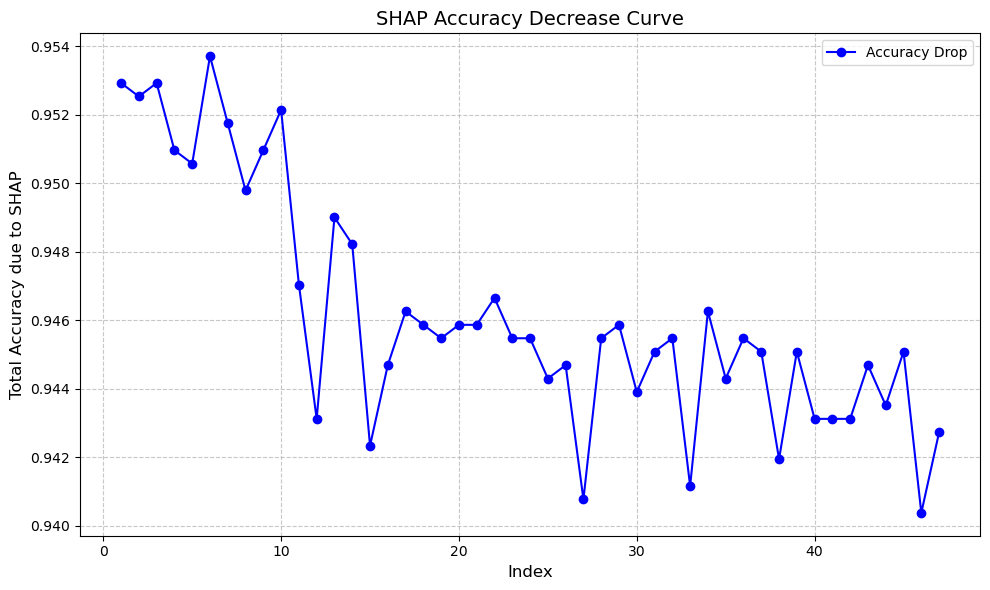

In [36]:
#plot for shap 
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_shap_accuracies) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_shap_accuracies, marker='o', linestyle='-', color='b', label='Accuracy Drop')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to SHAP', fontsize=12)
plt.title('SHAP Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
#nepřesný výpočet plochy pod křivkou přes body
AUC = 0
for x in loaded_array_shap_accuracies:
    AUC += x
print(AUC)

44.469988230678695


In [46]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(loaded_array_shap_accuracies, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 43.522165555119656


In [49]:
#df_sha_for_excel = pd.DataFrame(loaded_array_shap_accuracies, columns=['Accuracy'])
#df_sha_for_excel.to_excel("shap_accuracies.xlsx", index=False)

In [22]:
#getting accuracy of model by ARA importance 
accuracy2 = []
for value in array_ara_importance:
    #úprava dataframu, odebrání featurea
    data_df_clean_second = data_df_clean_second.drop(columns=[value])
    #print(data_df_clean.head(5))
    # Splitting the data into features and target labels
    X = data_df_clean_second.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean_second['medium']

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])

    positive_class_label = 'medium:'+mediumid

    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])

    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                               iterations=100000, 
                               loss_function="Logloss",
                               learning_rate=0.05,#0.001
                               depth=4,
                               l2_leaf_reg=4,
                               bagging_temperature=1,
                               random_strength=6,
                               verbose=100)
    model.fit(train_data, 
              eval_set=val_data,
              early_stopping_rounds=50 
             )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracy2.append(accuracy_score(y_test_binary, y_pred))
                 

0:	learn: 0.6575094	test: 0.6574400	best: 0.6574400 (0)	total: 158ms	remaining: 4h 22m 49s
100:	learn: 0.2318256	test: 0.2294559	best: 0.2294559 (100)	total: 1.21s	remaining: 19m 57s
200:	learn: 0.2066799	test: 0.2067294	best: 0.2067294 (200)	total: 2.26s	remaining: 18m 44s
300:	learn: 0.1849378	test: 0.1899954	best: 0.1899954 (300)	total: 3.29s	remaining: 18m 10s
400:	learn: 0.1720996	test: 0.1811941	best: 0.1811941 (400)	total: 4.36s	remaining: 18m 2s
500:	learn: 0.1633084	test: 0.1755513	best: 0.1755513 (500)	total: 5.44s	remaining: 18m 1s
600:	learn: 0.1567099	test: 0.1713788	best: 0.1713788 (600)	total: 6.58s	remaining: 18m 9s
700:	learn: 0.1518131	test: 0.1687111	best: 0.1687111 (700)	total: 7.81s	remaining: 18m 26s
800:	learn: 0.1469298	test: 0.1659323	best: 0.1659192 (798)	total: 9.08s	remaining: 18m 44s
900:	learn: 0.1428464	test: 0.1635746	best: 0.1635746 (900)	total: 10.2s	remaining: 18m 42s
1000:	learn: 0.1389307	test: 0.1616070	best: 0.1615788 (998)	total: 11.3s	remaining:

In [24]:
print(accuracy2)

[0.9474303648489604, 0.9513534719497843, 0.9525304040800314, 0.9501765398195371, 0.9482149862691251, 0.9509611612397019, 0.9497842291094547, 0.9529227147901138, 0.9513534719497843, 0.9474303648489604, 0.9482149862691251, 0.9513534719497843, 0.9466457434287956, 0.945076500588466, 0.9474303648489604, 0.9474303648489604, 0.9489996076892899, 0.9482149862691251, 0.9505688505296195, 0.9482149862691251, 0.947038054138878, 0.947038054138878, 0.9482149862691251, 0.9474303648489604, 0.9462534327187132, 0.9462534327187132, 0.9466457434287956, 0.947038054138878, 0.9466457434287956, 0.9489996076892899, 0.945076500588466, 0.9517457826598666, 0.9474303648489604, 0.945076500588466, 0.9478226755590428, 0.9501765398195371, 0.9509611612397019, 0.9493919183993723, 0.9466457434287956, 0.9466457434287956, 0.9493919183993723, 0.9466457434287956, 0.9454688112985484, 0.9454688112985484, 0.947038054138878, 0.9438995684582189, 0.9458611220086308, 0.9474303648489604, 0.9462534327187132, 0.947038054138878, 0.94586

In [26]:
#np.save('ARA_accuracy_array.npy', accuracy2)#save array of accuracies for ARA

In [7]:
loaded_array_ARA_accuracies = np.load('ARA_accuracy_array.npy')
print(loaded_array_ARA_accuracies)
#print(loaded_array_ARA_accuracies[1])
#print(len(loaded_array_ARA_accuracies))# chech if we have number of accuracies equal to number of shap items

[0.94743036 0.95135347 0.9525304  0.95017654 0.94821499 0.95096116
 0.94978423 0.95292271 0.95135347 0.94743036 0.94821499 0.95135347
 0.94664574 0.9450765  0.94743036 0.94743036 0.94899961 0.94821499
 0.95056885 0.94821499 0.94703805 0.94703805 0.94821499 0.94743036
 0.94625343 0.94625343 0.94664574 0.94703805 0.94664574 0.94899961
 0.9450765  0.95174578 0.94743036 0.9450765  0.94782268 0.95017654
 0.95096116 0.94939192 0.94664574 0.94664574 0.94939192 0.94664574
 0.94546881 0.94546881 0.94703805 0.94389957 0.94586112 0.94743036
 0.94625343 0.94703805 0.94586112 0.94546881 0.9450765  0.9450765
 0.9450765  0.94468419 0.9450765  0.94429188 0.94350726 0.94389957
 0.94036877 0.94076108 0.9415457  0.94076108 0.94311495 0.94311495
 0.93919184 0.94233033 0.94311495 0.94193801 0.94311495 0.9450765
 0.94233033 0.94311495 0.9415457  0.94115339 0.94115339 0.9415457
 0.93879953 0.94076108 0.93879953 0.94036877 0.93605335 0.94115339
 0.93840722 0.93958415 0.93997646 0.93919184 0.93723029 0.9384072

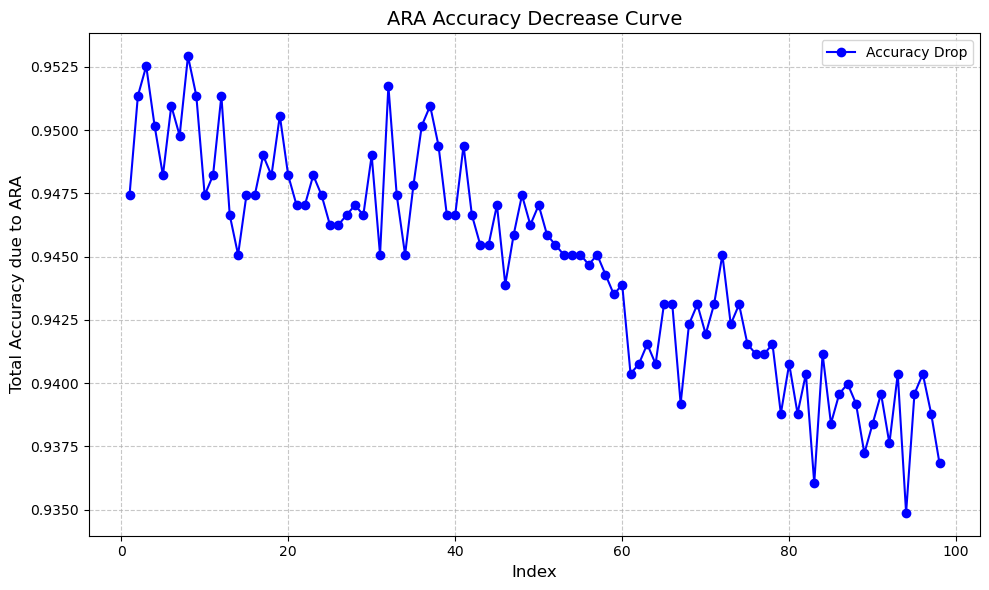

In [34]:
#plot for shap 
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_ARA_accuracies) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_ARA_accuracies, marker='o', linestyle='-', color='b', label='Accuracy Drop')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
first_47_accuracies_for_ARA = []
x = 0 
while x < 47:
    first_47_accuracies_for_ARA.append(loaded_array_ARA_accuracies[x])
    x += 1 
print(len(first_47_accuracies_for_ARA))
    

47


In [11]:
print(first_47_accuracies_for_ARA)

[0.9474303648489604, 0.9513534719497843, 0.9525304040800314, 0.9501765398195371, 0.9482149862691251, 0.9509611612397019, 0.9497842291094547, 0.9529227147901138, 0.9513534719497843, 0.9474303648489604, 0.9482149862691251, 0.9513534719497843, 0.9466457434287956, 0.945076500588466, 0.9474303648489604, 0.9474303648489604, 0.9489996076892899, 0.9482149862691251, 0.9505688505296195, 0.9482149862691251, 0.947038054138878, 0.947038054138878, 0.9482149862691251, 0.9474303648489604, 0.9462534327187132, 0.9462534327187132, 0.9466457434287956, 0.947038054138878, 0.9466457434287956, 0.9489996076892899, 0.945076500588466, 0.9517457826598666, 0.9474303648489604, 0.945076500588466, 0.9478226755590428, 0.9501765398195371, 0.9509611612397019, 0.9493919183993723, 0.9466457434287956, 0.9466457434287956, 0.9493919183993723, 0.9466457434287956, 0.9454688112985484, 0.9454688112985484, 0.947038054138878, 0.9438995684582189, 0.9458611220086308]


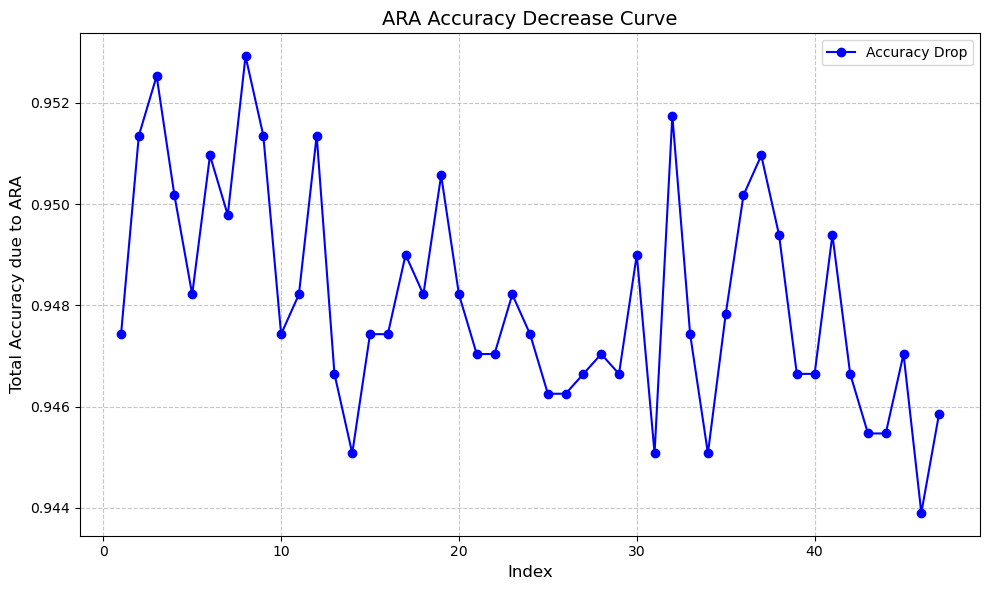

In [54]:
#plot for shap 
# X-axis values (1 to length of array)
x_values = list(range(1, len(first_47_accuracies_for_ARA) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, first_47_accuracies_for_ARA, marker='o', linestyle='-', color='b', label='Accuracy Drop')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [56]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X a spočítání obsahu 
area = np.trapz(first_47_accuracies_for_ARA, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 43.61396626127893


In [53]:
df_ARA_for_excel = pd.DataFrame(loaded_array_ARA_accuracies, columns=['Accuracy'])
df_ARA_for_excel.to_excel("ARA_accuracies.xlsx", index=False)

In [37]:
#vytvoření df s první hodnotou z feature importance za shap 
# Inicializace prázdného DataFrame se stejným indexem jako data_df_clean
data_df_clean_forward_shap = pd.DataFrame(index=data_df_clean.index)
data_df_clean_forward_shap['medium'] = data_df_clean['medium']
data_df_clean_forward_shap.head(5)

,medium
subject,
NCBITaxon:100,other
NCBITaxon:100053,other
NCBITaxon:1000562,other
NCBITaxon:1000566,other
NCBITaxon:1001,other


In [39]:
#getting accuracy of model by shap importance by adding values - forward
accuracy_shap_forward = []
for value in array_shap_importance:
    #úprava dataframu, přidávání features
    data_df_clean_forward_shap[value] = data_df_clean[value]
    data_df_clean_forward_shap.head(1)
    # Splitting the data into features and target labels
    X = data_df_clean_forward_shap.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean_forward_shap['medium']

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])

    positive_class_label = 'medium:'+mediumid

    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])

    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                               iterations=100000, 
                               loss_function="Logloss",
                               learning_rate=0.05,#0.001
                               depth=4,
                               l2_leaf_reg=4,
                               bagging_temperature=1,
                               random_strength=6,
                               verbose=100)
    model.fit(train_data, 
              eval_set=val_data,
              early_stopping_rounds=50 
             )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracy_shap_forward.append(accuracy_score(y_test_binary, y_pred))
    
#print(accuracy)             

0:	learn: 0.6567818	test: 0.6567219	best: 0.6567219 (0)	total: 168ms	remaining: 4h 40m 15s
100:	learn: 0.3805979	test: 0.3824885	best: 0.3824853 (89)	total: 480ms	remaining: 7m 54s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3824853135
bestIteration = 89

Shrink model to first 90 iterations.
Accuracy: 0.8677912907022362
0:	learn: 0.6513707	test: 0.6510973	best: 0.6510973 (0)	total: 3.67ms	remaining: 6m 7s
100:	learn: 0.3521775	test: 0.3531103	best: 0.3530978 (96)	total: 329ms	remaining: 5m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3530977973
bestIteration = 96

Shrink model to first 97 iterations.
Accuracy: 0.8677912907022362
0:	learn: 0.6513707	test: 0.6510973	best: 0.6510973 (0)	total: 3.87ms	remaining: 6m 27s
100:	learn: 0.3442772	test: 0.3454097	best: 0.3454097 (100)	total: 396ms	remaining: 6m 32s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3453810478
bestIteration = 110

Shrink model to first 111 iterati

In [61]:
print(accuracy_shap_forward)
np.save('shap_accuracy_forward_array.npy', accuracy_shap_forward)#save array of accuracies for shap

[0.8677912907022362, 0.8677912907022362, 0.8772067477442134, 0.8885837583366026, 0.8881914476265202, 0.8936837975676736, 0.8936837975676736, 0.8999607689289918, 0.9027069438995684, 0.9046684974499803, 0.9125147116516281, 0.9136916437818753, 0.9136916437818753, 0.9148685759121225, 0.9136916437818753, 0.9132993330717929, 0.9136916437818753, 0.9176147508826991, 0.9168301294625343, 0.9176147508826991, 0.9168301294625343, 0.9152608866222048, 0.9164378187524519, 0.9168301294625343, 0.9191839937230286, 0.9199686151431934, 0.9207532365633582, 0.9211455472734406, 0.9211455472734406, 0.9211455472734406, 0.9219301686936053, 0.919576304433111, 0.9219301686936053, 0.9203609258532758, 0.921537857983523, 0.921537857983523, 0.921537857983523, 0.9223224794036877, 0.9219301686936053, 0.9238917222440173, 0.9223224794036877, 0.9223224794036877, 0.9211455472734406, 0.9234994115339349, 0.9238917222440173, 0.924676343664182, 0.9289917614750882]


In [27]:
loaded_array_shap_accuracies_forward = np.load('shap_accuracy_forward_array.npy')
print(loaded_array_shap_accuracies_forward)
#print(loaded_array_shap_accuracies_forward[1])
#len(loaded_array_shap_accuracies_forward)# chech if we have number of accuracies equal to number of shap items

[0.86779129 0.86779129 0.87720675 0.88858376 0.88819145 0.8936838
 0.8936838  0.89996077 0.90270694 0.9046685  0.91251471 0.91369164
 0.91369164 0.91486858 0.91369164 0.91329933 0.91369164 0.91761475
 0.91683013 0.91761475 0.91683013 0.91526089 0.91643782 0.91683013
 0.91918399 0.91996862 0.92075324 0.92114555 0.92114555 0.92114555
 0.92193017 0.9195763  0.92193017 0.92036093 0.92153786 0.92153786
 0.92153786 0.92232248 0.92193017 0.92389172 0.92232248 0.92232248
 0.92114555 0.92349941 0.92389172 0.92467634 0.92899176]


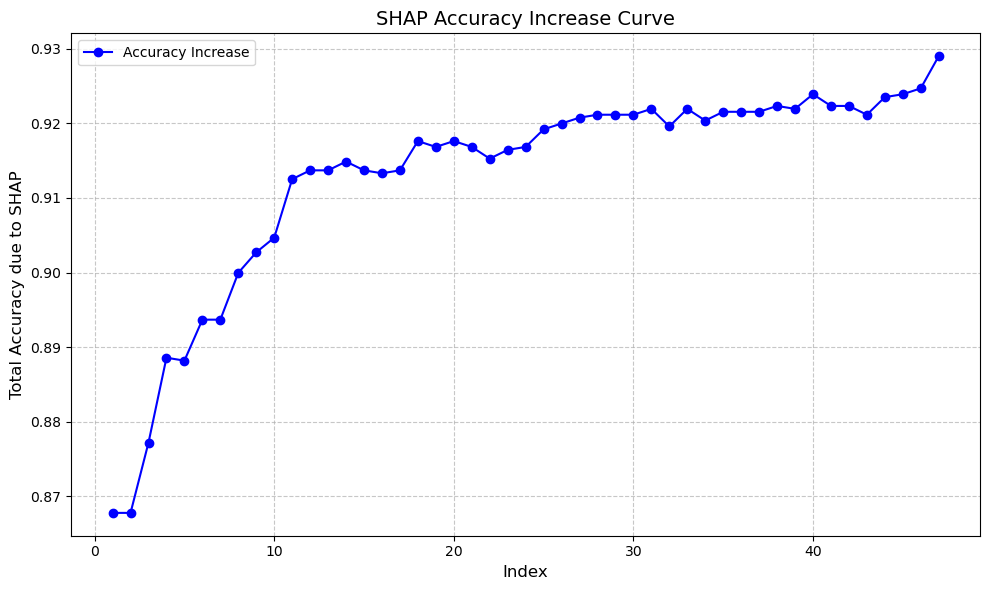

In [29]:
#plot for shap forward
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_shap_accuracies_forward) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_shap_accuracies_forward, marker='o', linestyle='-', color='b', label='Accuracy Increase')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to SHAP', fontsize=12)
plt.title('SHAP Accuracy Increase Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(loaded_array_shap_accuracies_forward, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 42.00549234994115


In [49]:
df_shap_forward_for_excel = pd.DataFrame(loaded_array_shap_accuracies_forward, columns=['Accuracy'])
df_shap_forward_for_excel.to_excel("shap_accuracies_forward.xlsx", index=False)

In [51]:
#vytvoření df s první hodnotou z feature importance za ARA 
# Inicializace prázdného DataFrame se stejným indexem jako data_df_clean
data_df_clean_forward_ARA = pd.DataFrame(index=data_df_clean.index)
data_df_clean_forward_ARA['medium'] = data_df_clean['medium']
data_df_clean_forward_ARA.head(5)

,medium
subject,
NCBITaxon:100,other
NCBITaxon:100053,other
NCBITaxon:1000562,other
NCBITaxon:1000566,other
NCBITaxon:1001,other


In [57]:
#getting accuracy of model by shap importance by adding values - forward
accuracy_ARA_forward = []
for value in array_ara_importance:
    #úprava dataframu, přidávání features
    data_df_clean_forward_ARA[value] = data_df_clean[value]
    data_df_clean_forward_ARA.head(1)
    # Splitting the data into features and target labels
    X = data_df_clean_forward_ARA.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean_forward_ARA['medium']

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])

    positive_class_label = 'medium:'+mediumid

    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])

    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                               iterations=100000, 
                               loss_function="Logloss",
                               learning_rate=0.05,#0.001
                               depth=4,
                               l2_leaf_reg=4,
                               bagging_temperature=1,
                               random_strength=6,
                               verbose=100)
    model.fit(train_data, 
              eval_set=val_data,
              early_stopping_rounds=50 
             )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracy_ARA_forward.append(accuracy_score(y_test_binary, y_pred))
    
#print(accuracy)             

0:	learn: 0.6493909	test: 0.6496363	best: 0.6496363 (0)	total: 5.76ms	remaining: 9m 35s
100:	learn: 0.3359982	test: 0.3390310	best: 0.3390305 (95)	total: 432ms	remaining: 7m 7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3390305251
bestIteration = 95

Shrink model to first 96 iterations.
Accuracy: 0.8677912907022362
0:	learn: 0.6476320	test: 0.6478401	best: 0.6478401 (0)	total: 4.43ms	remaining: 7m 22s
100:	learn: 0.3284531	test: 0.3304037	best: 0.3304037 (100)	total: 390ms	remaining: 6m 26s
200:	learn: 0.3284350	test: 0.3303969	best: 0.3303965 (157)	total: 690ms	remaining: 5m 42s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3303964955
bestIteration = 157

Shrink model to first 158 iterations.
Accuracy: 0.8677912907022362
0:	learn: 0.6493909	test: 0.6496363	best: 0.6496363 (0)	total: 2.91ms	remaining: 4m 51s
100:	learn: 0.3198735	test: 0.3228224	best: 0.3228214 (99)	total: 329ms	remaining: 5m 25s
Stopped by overfitting detector  (50 iterat

In [65]:
print(accuracy_ARA_forward)
np.save('ARA_accuracy_forward_array.npy', accuracy_ARA_forward)#save array of accuracies for ARA

[0.8677912907022362, 0.8677912907022362, 0.8834837191055316, 0.8834837191055316, 0.8834837191055316, 0.8803452334248725, 0.8807375441349549, 0.881914476265202, 0.8823067869752844, 0.8874068262063555, 0.883876029815614, 0.8846606512357787, 0.8897606904668497, 0.8913299333071792, 0.8960376618281679, 0.8968222832483327, 0.8944684189878384, 0.8968222832483327, 0.9007453903491566, 0.9038838760298156, 0.9027069438995684, 0.9023146331894861, 0.9034915653197332, 0.904276186739898, 0.904276186739898, 0.9066300510003923, 0.9062377402903099, 0.9054531188701451, 0.9046684974499803, 0.9101608473911338, 0.9101608473911338, 0.9097685366810514, 0.9144762652020401, 0.9117300902314633, 0.9101608473911338, 0.9140839544919577, 0.9101608473911338, 0.9097685366810514, 0.9140839544919577, 0.9144762652020401, 0.9164378187524519, 0.9144762652020401, 0.9148685759121225, 0.911337779521381, 0.9136916437818753, 0.9132993330717929, 0.9152608866222048, 0.9152608866222048, 0.9160455080423695, 0.9176147508826991, 0.91

In [13]:
loaded_array_ARA_accuracies_forward = np.load('ARA_accuracy_forward_array.npy')
print(loaded_array_ARA_accuracies_forward)
#print(loaded_array_shap_accuracies_forward[1])
#len(loaded_array_shap_accuracies_forward)# chech if we have number of accuracies equal to number of shap items

[0.86779129 0.86779129 0.88348372 0.88348372 0.88348372 0.88034523
 0.88073754 0.88191448 0.88230679 0.88740683 0.88387603 0.88466065
 0.88976069 0.89132993 0.89603766 0.89682228 0.89446842 0.89682228
 0.90074539 0.90388388 0.90270694 0.90231463 0.90349157 0.90427619
 0.90427619 0.90663005 0.90623774 0.90545312 0.9046685  0.91016085
 0.91016085 0.90976854 0.91447627 0.91173009 0.91016085 0.91408395
 0.91016085 0.90976854 0.91408395 0.91447627 0.91643782 0.91447627
 0.91486858 0.91133778 0.91369164 0.91329933 0.91526089 0.91526089
 0.91604551 0.91761475 0.91722244 0.9195763  0.92428403 0.92232248
 0.92193017 0.92389172 0.92271479 0.92389172 0.92467634 0.92271479
 0.93291487 0.92977638 0.93134563 0.93330718 0.93213025 0.92977638
 0.92938407 0.93095332 0.92938407 0.93134563 0.93016869 0.93095332
 0.93134563 0.93173794 0.93173794 0.93173794 0.93291487 0.93369949
 0.93291487 0.93134563 0.93252256 0.93173794 0.93291487 0.93213025
 0.93448411 0.93213025 0.93330718 0.93134563 0.93291487 0.9325

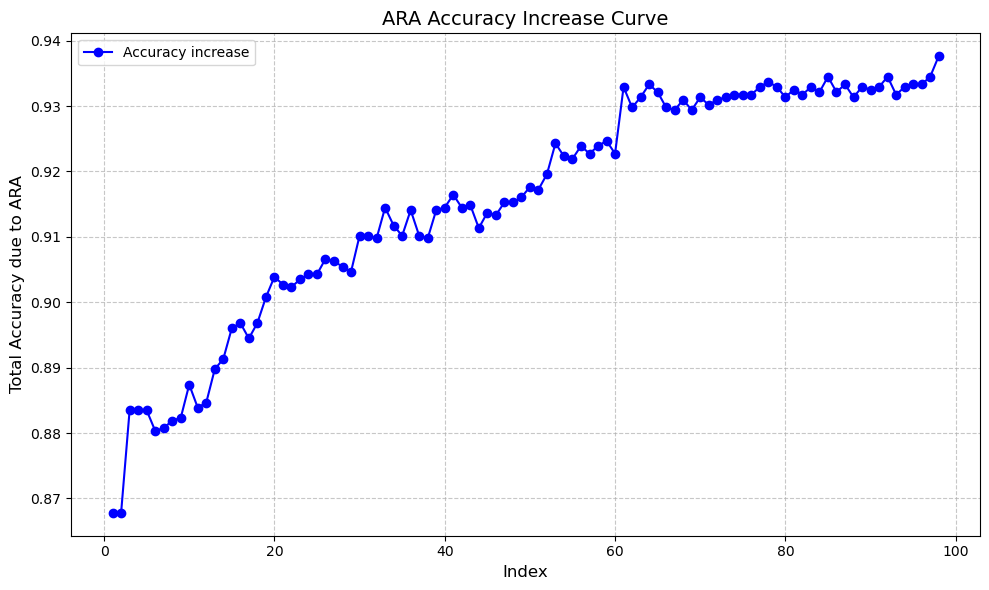

In [25]:
#plot for shap forward
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_ARA_accuracies_forward) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_ARA_accuracies_forward, marker='o', linestyle='-', color='b', label='Accuracy increase')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA Accuracy Increase Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
first_47_accuracies_for_ARA_forward = []
x = 0 
while x < 47:
    first_47_accuracies_for_ARA_forward.append(loaded_array_ARA_accuracies_forward[x])
    x += 1 
#print(len(first_47_accuracies_for_ARA_forward))
    

In [19]:
print(first_47_accuracies_for_ARA_forward)

[0.8677912907022362, 0.8677912907022362, 0.8834837191055316, 0.8834837191055316, 0.8834837191055316, 0.8803452334248725, 0.8807375441349549, 0.881914476265202, 0.8823067869752844, 0.8874068262063555, 0.883876029815614, 0.8846606512357787, 0.8897606904668497, 0.8913299333071792, 0.8960376618281679, 0.8968222832483327, 0.8944684189878384, 0.8968222832483327, 0.9007453903491566, 0.9038838760298156, 0.9027069438995684, 0.9023146331894861, 0.9034915653197332, 0.904276186739898, 0.904276186739898, 0.9066300510003923, 0.9062377402903099, 0.9054531188701451, 0.9046684974499803, 0.9101608473911338, 0.9101608473911338, 0.9097685366810514, 0.9144762652020401, 0.9117300902314633, 0.9101608473911338, 0.9140839544919577, 0.9101608473911338, 0.9097685366810514, 0.9140839544919577, 0.9144762652020401, 0.9164378187524519, 0.9144762652020401, 0.9148685759121225, 0.911337779521381, 0.9136916437818753, 0.9132993330717929, 0.9152608866222048]


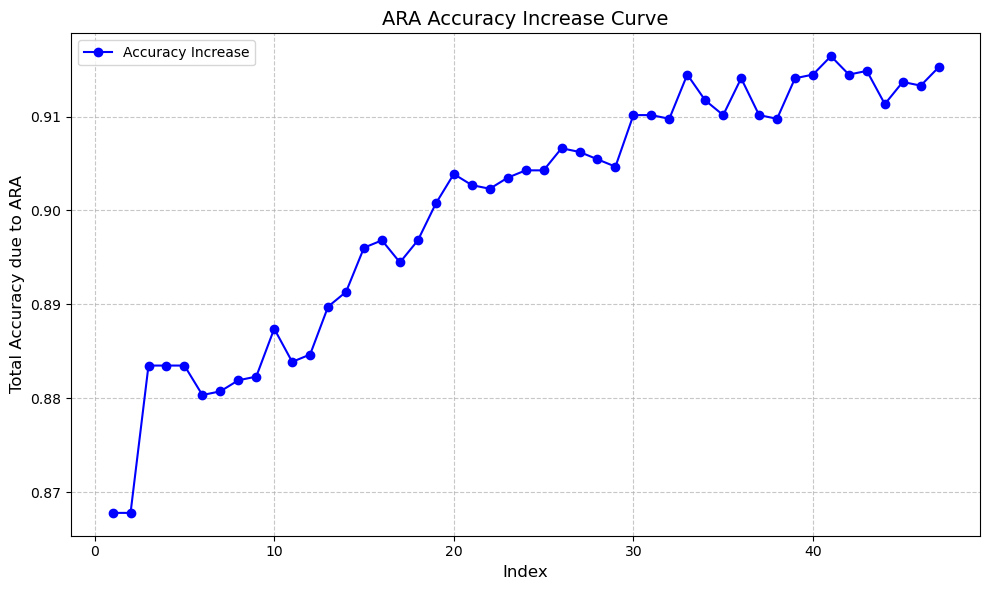

In [23]:
#plot for shap forward
# X-axis values (1 to length of array)
x_values = list(range(1, len(first_47_accuracies_for_ARA_forward) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, first_47_accuracies_for_ARA_forward, marker='o', linestyle='-', color='b', label='Accuracy Increase')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA Accuracy Increase Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [89]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(first_47_accuracies_for_ARA_forward, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 41.41408395449196


In [91]:
df_ARA_forward_for_excel = pd.DataFrame(loaded_array_ARA_accuracies_forward, columns=['Accuracy'])
df_ARA_forward_for_excel.to_excel("ARA_accuracies_forward.xlsx", index=False)

In [49]:
data_df_clean_factor.head(5)

,CHEBI:100147,CHEBI:10057,CHEBI:115156,CHEBI:125610,CHEBI:12931,CHEBI:12936,CHEBI:132106,CHEBI:132111,CHEBI:132112,CHEBI:132943,...,trophic_type:lithoautotrophy,trophic_type:lithoheterotrophy,trophic_type:lithotrophy,trophic_type:methylotrophy,trophic_type:mixotrophy,trophic_type:organoheterotrophy,trophic_type:organotrophy,trophic_type:photoheterotrophy,trophic_type:phototrophy,medium
subject,,,,,,,,,,,,,,,,,,,,,
NCBITaxon:100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:100053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1000562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1000566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other
NCBITaxon:1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,other


In [12]:
#odstranění sloupců dle výpočtu rozptylu, pokud 0, pak se odstraní sloupec
data_df_clean_factor = data_df_clean_factor.drop(columns=['medium'])
data_df_clean_factor = data_df_clean_factor.loc[:, (data_df_clean_factor.var() > 0)]
data_df_clean_factor.head(5)

,CHEBI:100147,CHEBI:10057,CHEBI:115156,CHEBI:125610,CHEBI:12931,CHEBI:12936,CHEBI:132106,CHEBI:132111,CHEBI:132112,CHEBI:132943,...,trophic_type:heterotrophy,trophic_type:lithoautotrophy,trophic_type:lithoheterotrophy,trophic_type:lithotrophy,trophic_type:methylotrophy,trophic_type:mixotrophy,trophic_type:organoheterotrophy,trophic_type:organotrophy,trophic_type:photoheterotrophy,trophic_type:phototrophy
subject,,,,,,,,,,,,,,,,,,,,,
NCBITaxon:100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:100053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:1000562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:1000566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#data_df_clean_factor.to_csv('data_clean_factor.csv', index=True)

NameError: name 'data_df_clean_factor' is not defined

In [ ]:
# oddíl faktorové analýzy 

In [16]:
data_df_clean_factor = pd.read_csv('data_clean_factor.csv')
data_df_clean_factor = data_df_clean_factor.set_index(data_df_clean_factor.columns[0])
#data_df_clean_factor = data_df_clean_factor.drop(columns=['medium'])

In [23]:
# standardizace - nefungovala 

In [44]:
# Dataset modification -correlation   
# Correlation matrix
corr_matrix = data_df_clean_factor.corr().abs()

# Upper triangular part of the nut
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1)

# List of columns that have a strong correlation (correlation > 0.4) with other columns
drop_cols = []

# Iteration over all columns in the correlation matrix
for column in corr_matrix.columns:
    col_idx = corr_matrix.columns.get_loc(column)
    
    # Creating a logical mask for the values in the upper triangular part
    mask = upper_triangle[col_idx] == 1  # Getting the values in the upper triangular part for the given column
    
    # Check for correlations greater than 0.4
    if any(corr_matrix[column][mask] > 0.4) and column not in array_ara_importance and column not in array_shap_importance:
        drop_cols.append(column)

print(f"removing {len(drop_cols)} correlated atributes...")

# remove columns from the original dataset
data_df_clean_factor = data_df_clean_factor.drop(columns=drop_cols)

removing 613 correlated atributes...


In [46]:
# Getting the variance for each column - not used
variances = data_df_clean_factor.var()

# Ranking of variances in descending order (highest to lowest)
sorted_variances_desc = variances.sort_values(ascending=False)

# Ranking of variances in ascending order (from lowest to highest)
sorted_variances_asc = variances.sort_values(ascending=True)

# Obtaining the 25th percentile (first quartile) of the variances
first_quartile = sorted_variances_desc.quantile(0.25)

# List of columns with variability less than the threshold
low_variance_columns = []

for column, variance in sorted_variances_desc.items():
    # Pokud je rozptyl menší nebo roven 25. percentilu a atribut není v seznamu array_ara_importance nebo array_shap_importance
    if variance <= first_quartile and column not in array_ara_importance and column not in array_shap_importance:
        low_variance_columns.append(column)

# Removing columns with low variability
data_df_clean_factor = data_df_clean_factor.drop(columns=low_variance_columns)
print(f"removed {len(low_variance_columns)} attributes")


removed 268 attributes


In [19]:
# kontrola počtu důležitých atributů pro ara/shap
x = 0
for item in array_ara_importance:
    if item in data_df_clean_factor:
        x +=1
print(x)

98


In [48]:
#test for factor analysis - Bartlett's test and KMO test - values sufficient  
bartlett_test = calculate_bartlett_sphericity(data_df_clean_factor)
kmo_all, kmo_model = calculate_kmo(data_df_clean_factor)
print(f"Bartlett's Test: {bartlett_test}")
print(f"KMO: {kmo_model}")

C:\Users\Marek H\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Bartlett's Test: (4217484.591005148, 0.0)
KMO: 0.7987393616243856


In [10]:
data_df_clean_factor.head(5)

,CHEBI:100147,CHEBI:10057,CHEBI:115156,CHEBI:125610,CHEBI:12931,CHEBI:12936,CHEBI:132106,CHEBI:132111,CHEBI:132112,CHEBI:132943,...,trophic_type:heterotrophy,trophic_type:lithoautotrophy,trophic_type:lithoheterotrophy,trophic_type:lithotrophy,trophic_type:methylotrophy,trophic_type:mixotrophy,trophic_type:organoheterotrophy,trophic_type:organotrophy,trophic_type:photoheterotrophy,trophic_type:phototrophy
subject,,,,,,,,,,,,,,,,,,,,,
NCBITaxon:100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:100053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:1000562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:1000566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCBITaxon:1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#PCA
pca = PCA(n_components=100)  
pca.fit(data_df_clean_factor)
ev = pca.explained_variance_
pca_components = pca.transform(data_df_clean_factor)

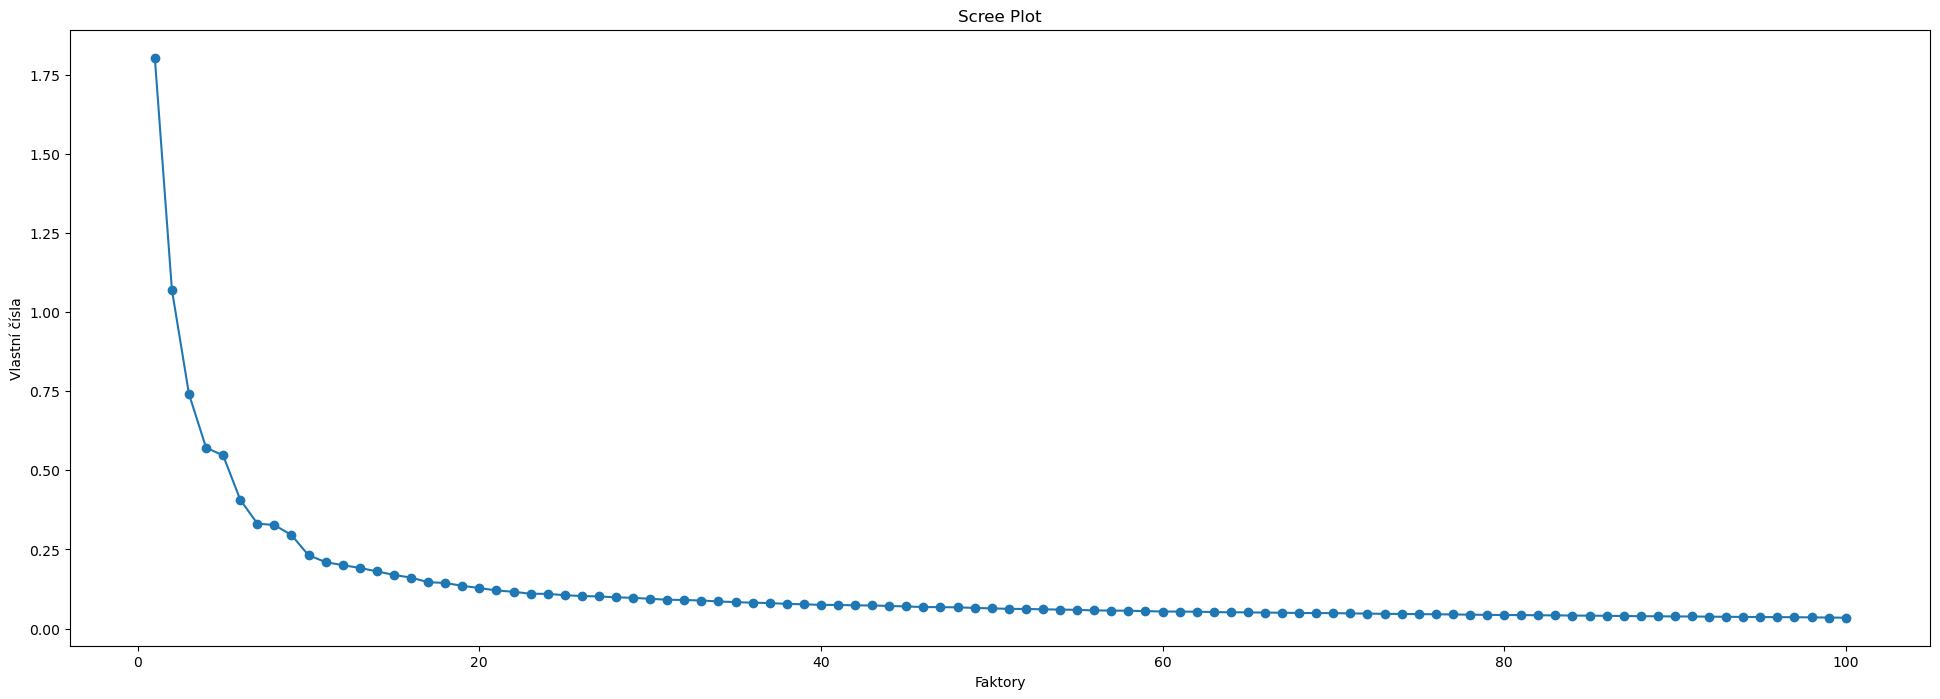

In [24]:
# graf k PCA
plt.figure(figsize=(24, 8))  
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.ion()  
plt.xlabel("Faktory")
plt.ylabel("Vlastní čísla")
plt.title("Scree Plot")
plt.show()

In [26]:
#factor analysis
# max number of factors
factors = 20


faktor_an = FactorAnalyzer(n_factors=factors, rotation="varimax")
faktor_an.fit(pca_components)

#factor eigenvalues
ev, v = faktor_an.get_eigenvalues()
print(f"Vlastní čísla pro faktory: {ev}")
# ev = vlastní číslo faktoru, v = vlastní vektor (směr ve kterém leží atributy faktoru) 

Vlastní čísla pro faktory: [1.00454438 1.00361652 1.00286633 1.00192672 1.00136135 1.00079172
 1.00055749 1.00034116 1.00015141 1.00007266 1.00000156 1.00000064
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999998 0.99999996
 0.99999994 0.99999993 0.99999992 0.99999987 0.99999974 0.99999972
 0.99999964 0.99999938 0.99999922 0.99999914 0.99999891 0.99999889
 0.9999986  0.99999849 0.99999825 0.99999781 0.99999678 0.99999469
 0.99999405 0.99999077 0.99998652 0.99998358 0.99998083 0.99997494
 0.9999726  0.9999655  0.99996158 0.99995436 0.99995073 0.99994675
 0.99994135 0.99993473 0.99991553 0.99990753 0.99988985 0.9998654
 0.99985462 0.9998423  0.99983437 0.99978932 0.99977236 0.99974723
 0.99969123 0.99965622 0.99959441 0.99955521 0.99954582 0.99943931
 

In [28]:
np.save('eigenvalues.npy', ev)
np.save('eigenvectors.npy', v)

In [30]:
# Načtení vlastních čísel
ev_loaded = np.load('eigenvalues.npy')

# Načtení vektorů
v_loaded = np.load('eigenvectors.npy')

In [32]:
print(ev_loaded)

[1.00454438 1.00361652 1.00286633 1.00192672 1.00136135 1.00079172
 1.00055749 1.00034116 1.00015141 1.00007266 1.00000156 1.00000064
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999998 0.99999996
 0.99999994 0.99999993 0.99999992 0.99999987 0.99999974 0.99999972
 0.99999964 0.99999938 0.99999922 0.99999914 0.99999891 0.99999889
 0.9999986  0.99999849 0.99999825 0.99999781 0.99999678 0.99999469
 0.99999405 0.99999077 0.99998652 0.99998358 0.99998083 0.99997494
 0.9999726  0.9999655  0.99996158 0.99995436 0.99995073 0.99994675
 0.99994135 0.99993473 0.99991553 0.99990753 0.99988985 0.9998654
 0.99985462 0.9998423  0.99983437 0.99978932 0.99977236 0.99974723
 0.99969123 0.99965622 0.99959441 0.99955521 0.99954582 0.99943931
 0.99943159 0.99933145 0.999

In [34]:
print(v_loaded)

[ 6.36544261e-03  5.34037115e-03  4.03209546e-03  3.06863798e-03
  2.47357881e-03  1.90256091e-03  1.38249845e-03  1.16800997e-03
  8.65379959e-04  6.07074502e-04  5.68482300e-04  5.07541679e-04
  3.61192726e-04  3.51585694e-04  2.95886045e-04  2.70336288e-04
  2.29189405e-04  1.89642176e-04  1.64801937e-04  9.56645548e-05
  6.26923053e-05  4.39171000e-05  3.74896101e-05  2.99541456e-05
  2.55565163e-05  1.18480527e-05  9.56429851e-06  5.36968560e-06
  3.45514972e-06  1.18469981e-06  3.02887159e-07  8.10356115e-08
  2.05780747e-08  5.58211720e-09  5.30932934e-11  2.33391611e-12
  2.38638980e-13  1.82827908e-14  1.94250171e-15  1.04079979e-15
  5.22514253e-16  3.05036373e-16  3.66389297e-17 -3.56195885e-16
 -8.74010679e-16 -1.17327948e-15 -1.72554515e-15 -5.21810318e-15
 -1.87411150e-14 -5.77778007e-14 -8.39844683e-14 -1.19123487e-13
 -9.37641820e-13 -1.35681153e-11 -3.68934693e-11 -6.05087914e-11
 -8.72080756e-11 -1.46739461e-10 -1.92429057e-10 -2.35465954e-10
 -3.25009661e-10 -8.44460

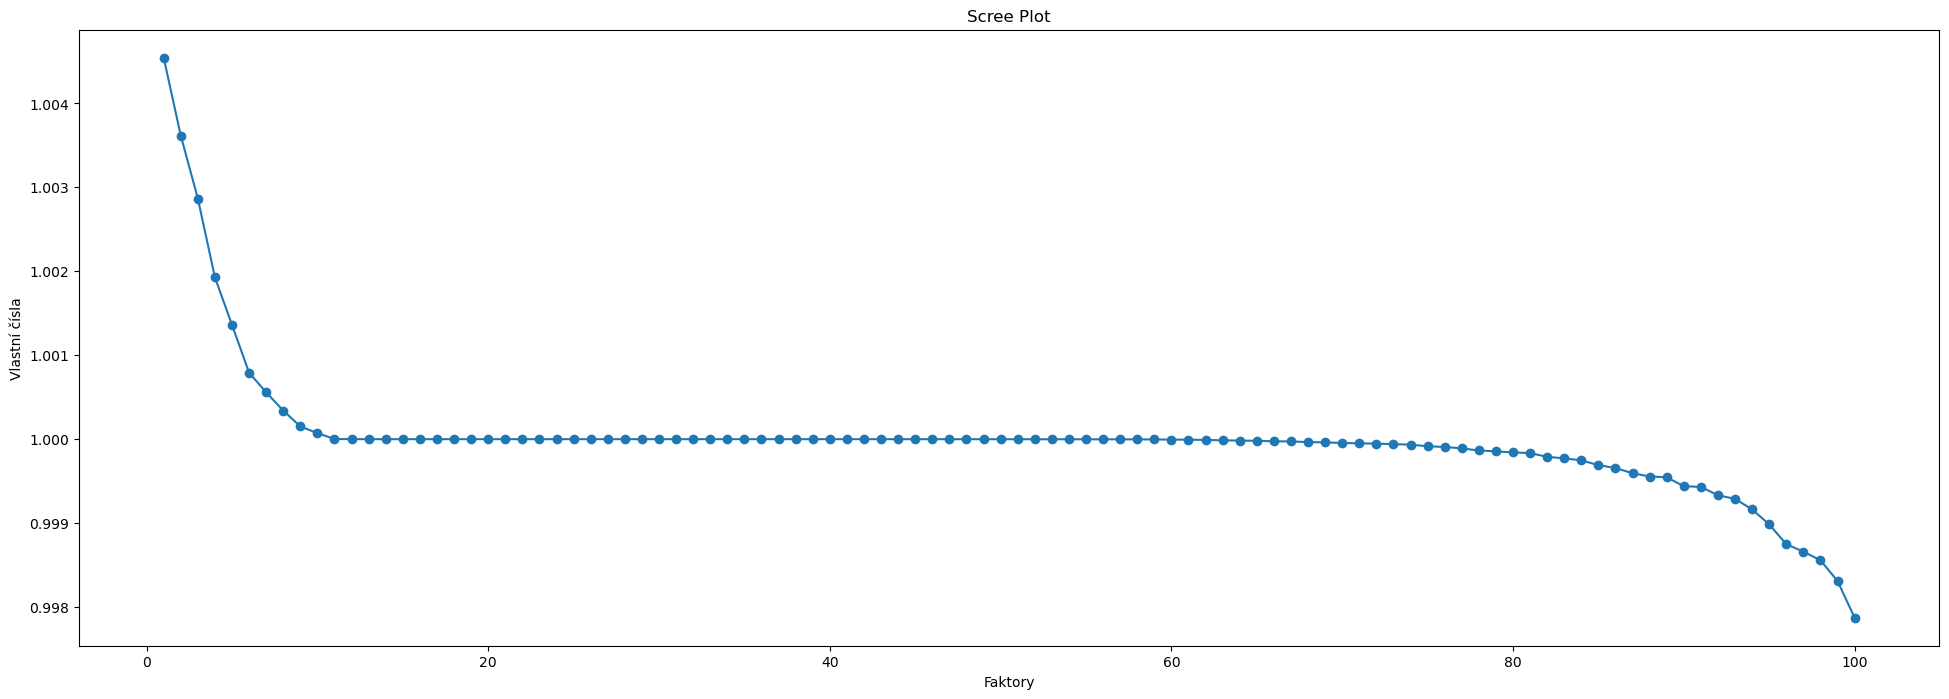

In [36]:
# Chart for factor analysis
plt.figure(figsize=(24, 8))  
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.ion()  
plt.xlabel("Faktory")
plt.ylabel("Vlastní čísla")
plt.title("Scree Plot")
plt.show()

In [38]:
num_valid_factors = sum(ev > 1)
print(f"Počet faktorů s vlastním číslem > 1: {num_valid_factors}")

Počet faktorů s vlastním číslem > 1: 18


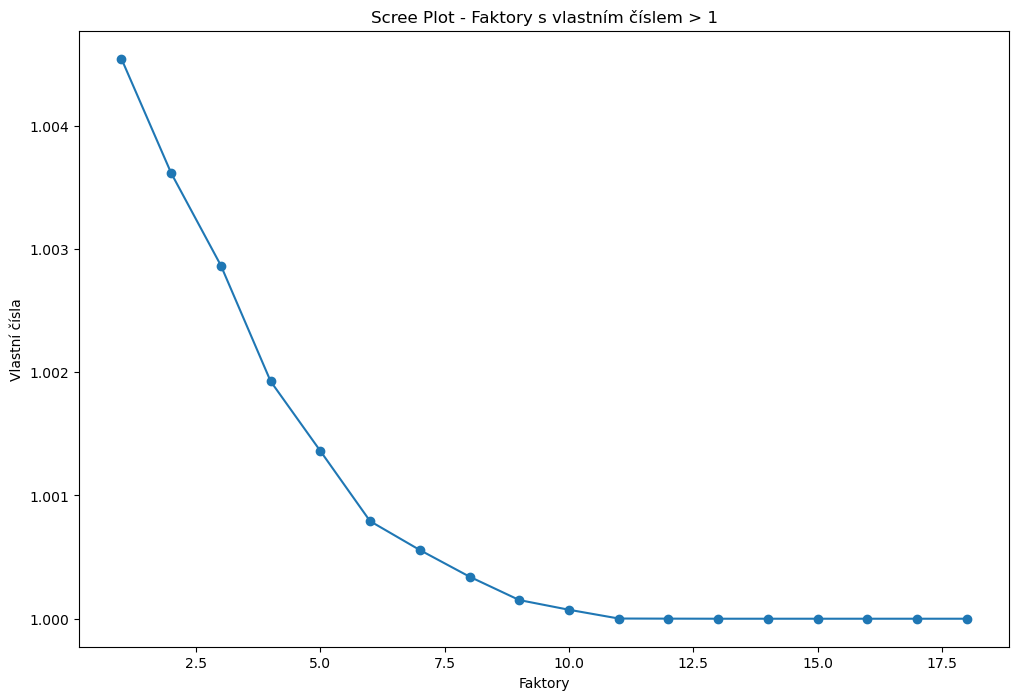

In [40]:
# Seřadíme vlastní čísla (ev) a vybereme pouze faktory s vlastním číslem > 1
valid_ev = ev[ev > 1]

# Vytvoříme graf pro těchto 18 faktorů
plt.figure(figsize=(12, 8))  
plt.scatter(range(1, len(valid_ev)+1), valid_ev)  # Scatter plot pouze pro platné faktory
plt.plot(range(1, len(valid_ev)+1), valid_ev)  # Připojíme čáru pro lepší vizualizaci
plt.xlabel("Faktory")
plt.ylabel("Vlastní čísla")
plt.title("Scree Plot - Faktory s vlastním číslem > 1")# Získání faktorových zatížení
loadings = faktor_an.loadings_

# Vytvoření DataFrame pro lepší zobrazení zatížení
loadings_df = pd.DataFrame(loadings, columns=range(1, factors + 1))  # Faktory jako sloupce
loadings_df.index = data_df_clean_factor.columns  # Původní atributy jako řádky

# Zobrazení faktorových zatížení
print(loadings_df)

plt.show()

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# druhá PCA analýza - zde odebírání atributů a celých jejich komponent 

In [20]:
#PCA
pca = PCA(n_components=100)  # Zkuste nižší počet komponent
pca.fit(data_df_clean_factor)
ev = pca.explained_variance_
pca_components = pca.transform(data_df_clean_factor)

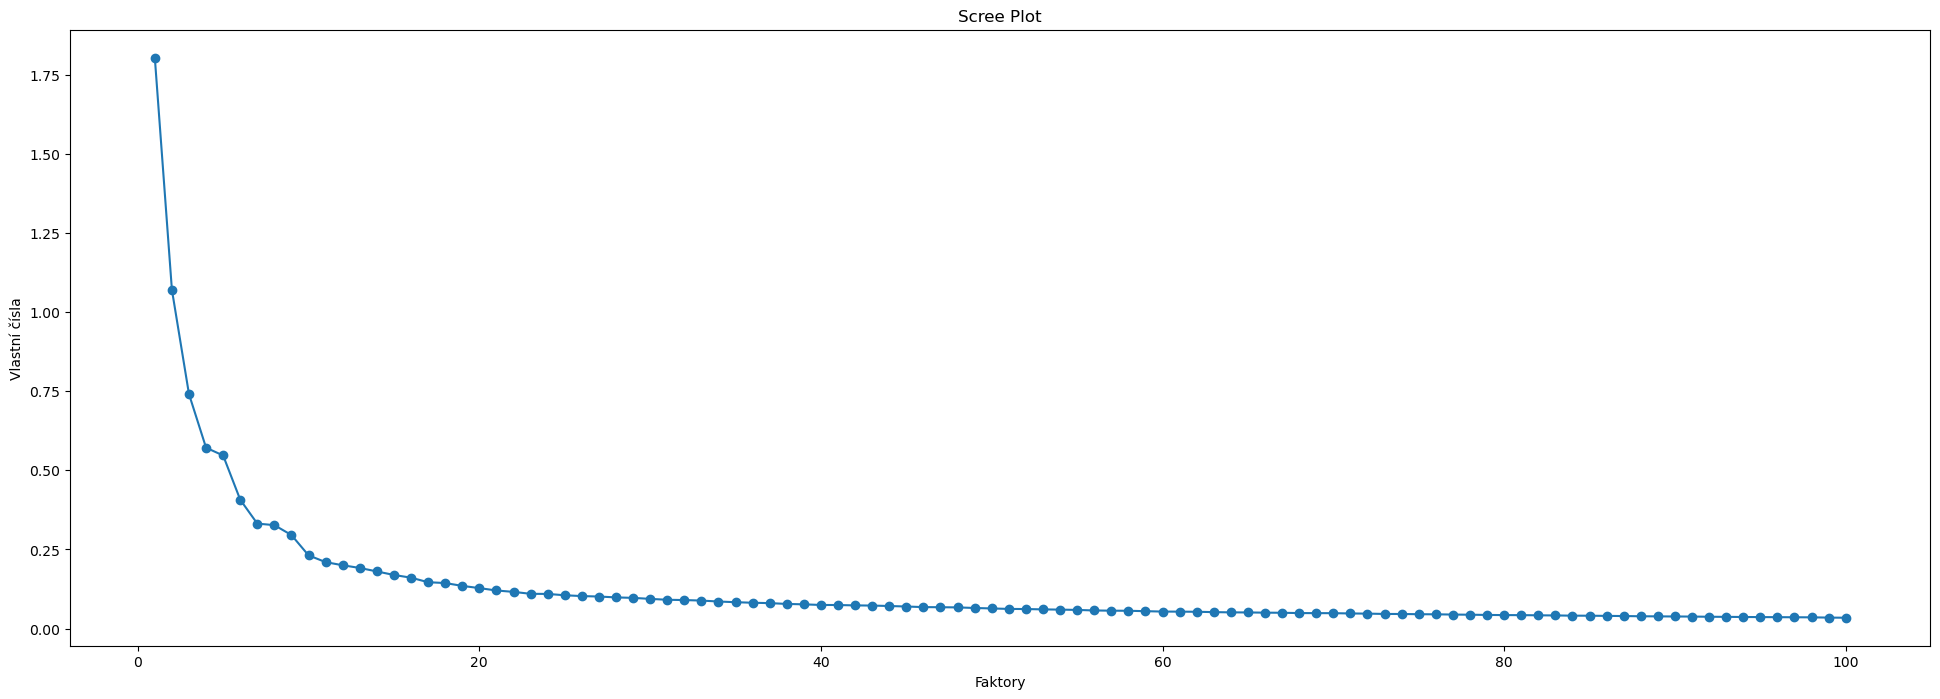

In [17]:
# graf k PCA
plt.figure(figsize=(24, 8))  
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.ion()  
plt.xlabel("Faktory")
plt.ylabel("Vlastní čísla")
plt.title("Scree Plot")
plt.show()

In [ ]:
#Kaiserovo pravidlo - nechat ty s vlastním číslem > 1. - v tomto případě nechám 7 - podle elbow 

In [14]:
# ideální počet komponent
pca = PCA(n_components=7)
pca.fit(data_df_clean_factor)
ev = pca.explained_variance_
pca_components = pca.transform(data_df_clean_factor)

# Zjištění příspěvku jednotlivých atributů k hlavním komponentám
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=data_df_clean_factor.columns)

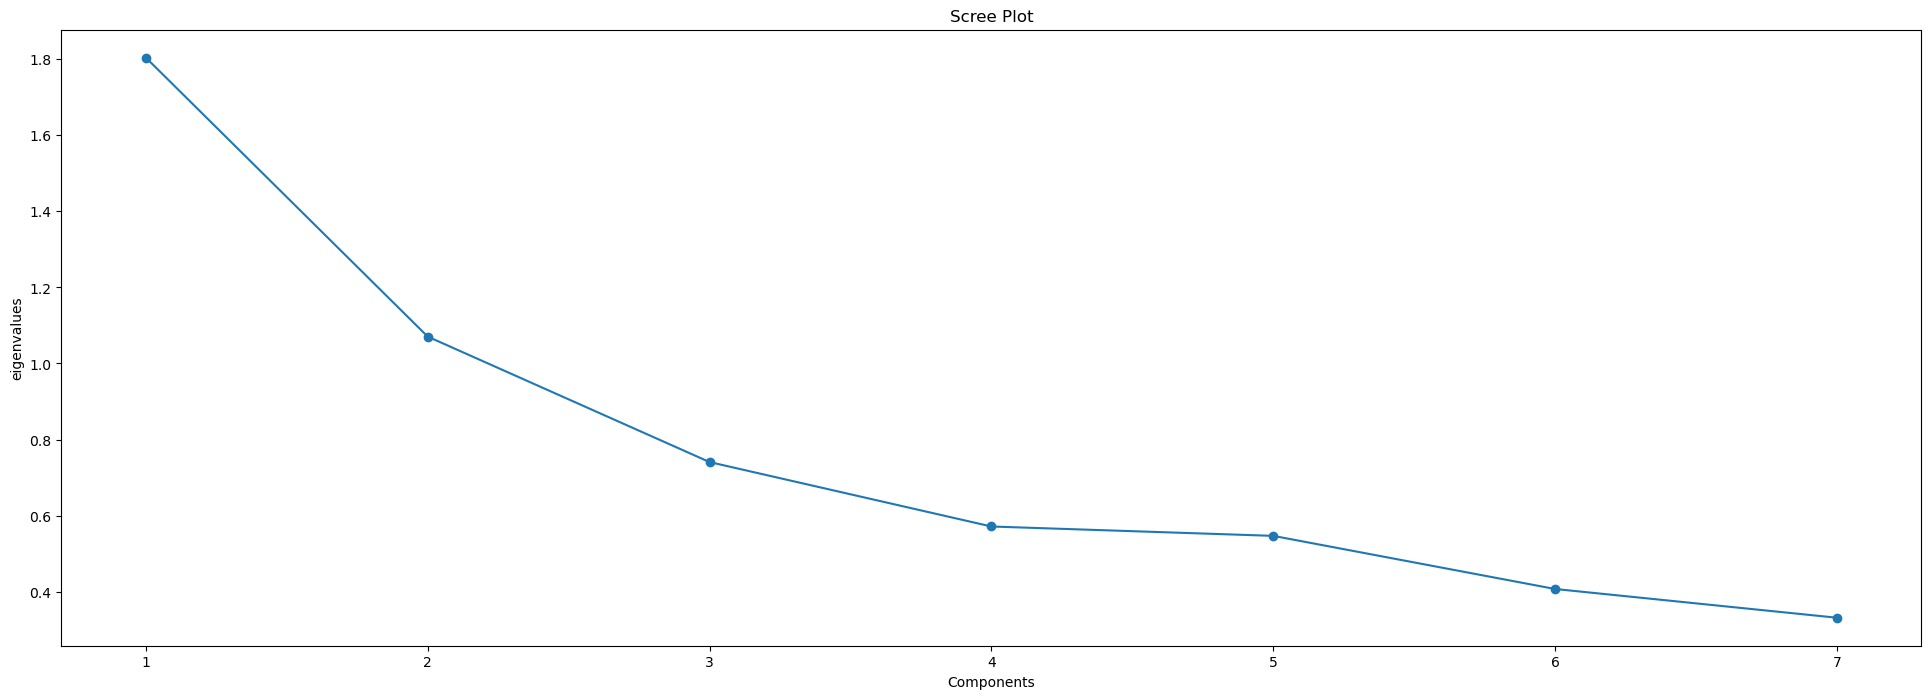

In [16]:
# graf k PCA
plt.figure(figsize=(24, 8))  
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.ion()  
plt.xlabel("Components")
plt.ylabel("eigenvalues")
plt.title("Scree Plot")
plt.show()

In [23]:
print(array_shap_importance[0])

cell_shape:bacillus


In [86]:
atribut = 'cell_shape:bacillus' 
prispivani = loadings.loc[atribut].sort_values(ascending=False)
print(prispivani)

PC1    0.105412
PC5    0.104932
PC4    0.023750
PC7    0.020588
PC6    0.011077
PC3   -0.021034
PC2   -0.102514
Name: cell_shape:bacillus, dtype: float64


In [13]:
# Zjištění nejvýznamnější komponenty (absolutní hodnota pro kladné i záporné příspěvky)
atribut = 'cell_shape:bacillus'
prispivani = loadings.loc[atribut].sort_values(ascending=False)
nejdulezitejsi_komponenta = prispivani.abs().idxmax()
#hodnota_prispevku = prispivani[nejdulezitejsi_komponenta]
print(nejdulezitejsi_komponenta)

PC1


In [66]:
prispevky_atributu = {}
for column in data_df_clean_factor:
    prispivani = loadings.loc[column]
    nejdulezitejsi_komponenta = prispivani.abs().idxmax()
    prispevky_atributu.setdefault(nejdulezitejsi_komponenta, []).append(column)
for key, values in prispevky_atributu.items():
    print(f'Klíč: {key}, Počet hodnot v poli: {len(values)}')

Klíč: PC6, Počet hodnot v poli: 306
Klíč: PC7, Počet hodnot v poli: 534
Klíč: PC3, Počet hodnot v poli: 201
Klíč: PC5, Počet hodnot v poli: 262
Klíč: PC1, Počet hodnot v poli: 94
Klíč: PC2, Počet hodnot v poli: 76
Klíč: PC4, Počet hodnot v poli: 210


In [85]:
#odstraňování atributů v závislosti na tom, jestli patří do komponenty jako vybraný atribut za SHAP 
accuracies_shap_PCA = []
z = 0
while len(prispevky_atributu) > 1:
    print(f"HODNOTA Y: {z}")
    print(f"počet komponent: {len(prispevky_atributu)}")
    print(f"délka dataframu: {data_df_clean_factor.shape[1]}")
    prispivani = loadings.loc[array_shap_importance[z]]
    nejdulezitejsi_komponenta = prispivani.abs().idxmax()
    if nejdulezitejsi_komponenta in prispevky_atributu:
        #print(f"počet atributů k odstranění: {len(prispevky_atributu[nejdulezitejsi_komponenta])}")
        data_df_clean_factor = data_df_clean_factor.drop(columns=prispevky_atributu[nejdulezitejsi_komponenta])
        del prispevky_atributu[nejdulezitejsi_komponenta]
        #data_df_clean_factor.head(5)
        z +=1
    else:
        z +=1
        continue
    # Splitting the data into features and target labels
    X = data_df_clean_factor.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean_factor['medium']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)
    
    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])
    
    positive_class_label = 'medium:'+mediumid
    
    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])
    
    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                                iterations=100000, 
                                loss_function="Logloss",
                                learning_rate=0.05,#0.001
                                depth=4,
                                l2_leaf_reg=4,
                                bagging_temperature=1,
                                random_strength=6,
                                verbose=100)
    model.fit(train_data, 
                eval_set=val_data,
                early_stopping_rounds=50 
                )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracies_shap_PCA.append(accuracy_score(y_test_binary, y_pred))
    
#print(accuracy)             

HODNOTA Y: 0
počet komponent: 7
délka dataframu: 1684
0:	learn: 0.6586396	test: 0.6586613	best: 0.6586613 (0)	total: 11.9ms	remaining: 19m 51s
100:	learn: 0.2256290	test: 0.2254189	best: 0.2254189 (100)	total: 1s	remaining: 16m 33s
200:	learn: 0.2006628	test: 0.2025105	best: 0.2025105 (200)	total: 1.97s	remaining: 16m 19s
300:	learn: 0.1792411	test: 0.1861819	best: 0.1861819 (300)	total: 2.98s	remaining: 16m 27s
400:	learn: 0.1674813	test: 0.1787640	best: 0.1787640 (400)	total: 4.02s	remaining: 16m 38s
500:	learn: 0.1597308	test: 0.1737464	best: 0.1737464 (500)	total: 5.14s	remaining: 17m
600:	learn: 0.1534412	test: 0.1701746	best: 0.1701740 (599)	total: 6.29s	remaining: 17m 21s
700:	learn: 0.1479216	test: 0.1671098	best: 0.1671098 (700)	total: 7.52s	remaining: 17m 45s
800:	learn: 0.1432128	test: 0.1643639	best: 0.1643591 (799)	total: 8.59s	remaining: 17m 44s
900:	learn: 0.1391394	test: 0.1620878	best: 0.1620878 (900)	total: 9.66s	remaining: 17m 42s
1000:	learn: 0.1357441	test: 0.16018

In [91]:
np.save('SHAP_PCA_accuracy_array.npy', accuracies_shap_PCA)#save array of accuracies for PCA SHAP

In [93]:
loaded_array_SHAP_PCA_accuracies = np.load('SHAP_PCA_accuracy_array.npy')
print(loaded_array_SHAP_PCA_accuracies)

[0.95292271 0.94115339 0.9376226  0.93252256 0.90937623 0.87759906]


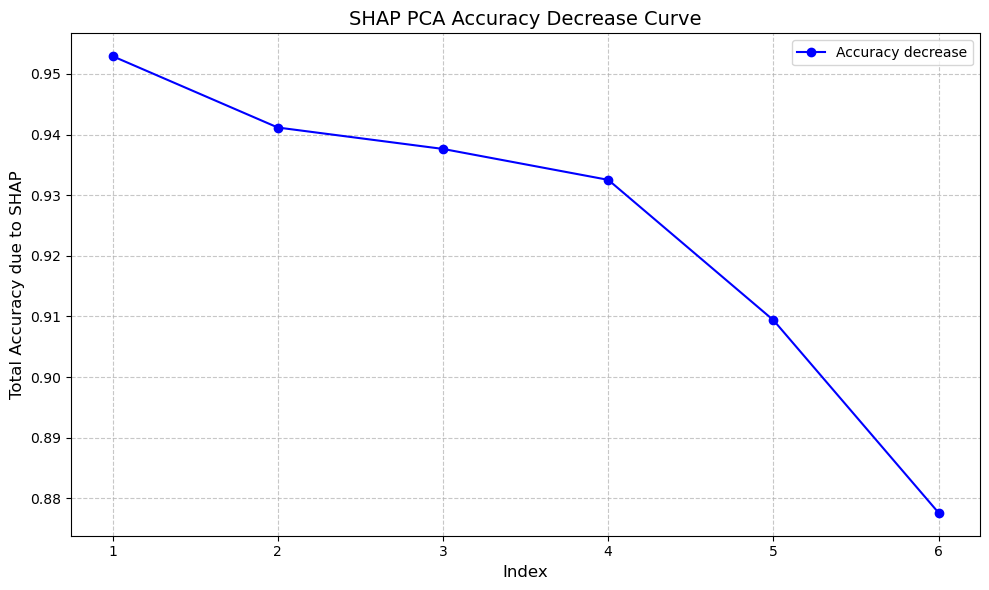

In [95]:
#plot for shap PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_SHAP_PCA_accuracies) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_SHAP_PCA_accuracies, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to SHAP', fontsize=12)
plt.title('SHAP PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [97]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(loaded_array_SHAP_PCA_accuracies, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 4.635935661043547


In [ ]:
# výpočet SHAP pro ideální počet komponent z PCA analýzy ---------------------------------------------------------------------------------------------

0:	learn: 0.6442016	test: 0.6452623	best: 0.6452623 (0)	total: 140ms	remaining: 3h 54m
100:	learn: 0.2198928	test: 0.2254914	best: 0.2254914 (100)	total: 705ms	remaining: 11m 37s
200:	learn: 0.2081746	test: 0.2160608	best: 0.2160608 (200)	total: 1.24s	remaining: 10m 16s
300:	learn: 0.1957859	test: 0.2082640	best: 0.2082640 (300)	total: 1.76s	remaining: 9m 42s
400:	learn: 0.1862705	test: 0.2041349	best: 0.2041349 (400)	total: 2.31s	remaining: 9m 33s
500:	learn: 0.1789848	test: 0.2009364	best: 0.2009286 (499)	total: 2.8s	remaining: 9m 16s
600:	learn: 0.1734092	test: 0.1990229	best: 0.1990229 (600)	total: 3.31s	remaining: 9m 7s
700:	learn: 0.1686694	test: 0.1980453	best: 0.1980453 (700)	total: 3.81s	remaining: 8m 59s
800:	learn: 0.1642689	test: 0.1969783	best: 0.1969362 (799)	total: 4.3s	remaining: 8m 52s
900:	learn: 0.1605158	test: 0.1963044	best: 0.1962844 (899)	total: 4.87s	remaining: 8m 55s
1000:	learn: 0.1567525	test: 0.1958078	best: 0.1957592 (973)	total: 5.45s	remaining: 8m 59s
110

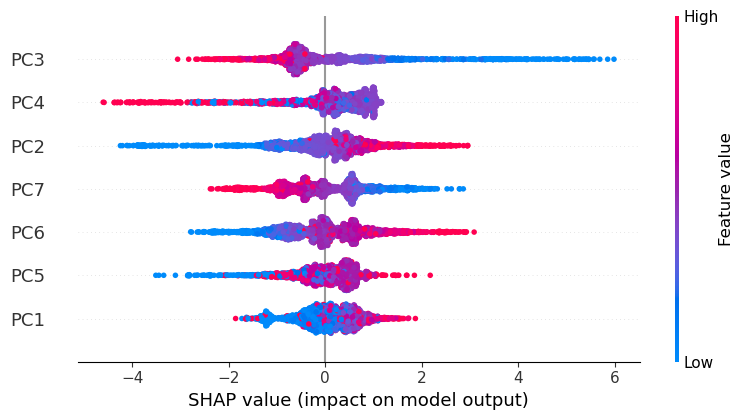

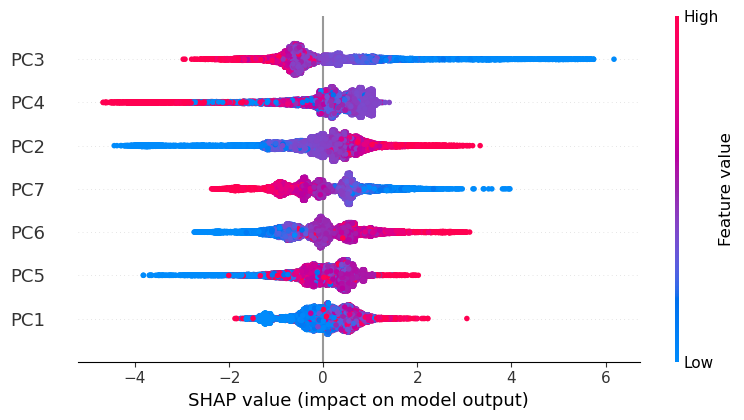

     mean_abs_shap_value
PC3             0.913744
PC4             0.721957
PC2             0.704565
PC7             0.688571
PC6             0.679540
PC5             0.470620
PC1             0.460024


In [27]:

# 1. Splitting the data into features and target labels
X = data_df_clean_factor.drop('medium', axis=1)  # features (bez cílové proměnné)
y = data_df_clean_factor['medium']  # cílová proměnná

# 2. Provedení PCA
pca = PCA(n_components=7)
pca_components = pca.fit_transform(X)  # aplikace PCA na vstupní data (X)

# 3. Rozdělení na trénovací, validační a testovací sady
X_train, X_temp, y_train, y_temp = train_test_split(pca_components, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

# 4. Převedení cílové proměnné na binární formát
positive_class_label = 'medium:' + mediumid
y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

# 5. Vytvoření Pool objektů pro CatBoost
train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])

# 6. Trénování CatBoost modelu
model = CatBoostClassifier(
    random_seed=RANDOM_SEED,
    iterations=100000,
    loss_function="Logloss",
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=4,
    bagging_temperature=1,
    random_strength=6,
    verbose=100
)

# 7. Trénování na hlavních komponentách (PCA transformovaných datech)
model.fit(train_data, 
          eval_set=val_data, 
          early_stopping_rounds=50)

# 8. Predikce na testovacích datech
y_pred = model.predict(test_data)
y_pred_proba = model.predict_proba(test_data)[:, 1]  # Pravděpodobnosti pro pozitivní třídu

# 9. Vyhodnocení metriky přesnost
print("Accuracy:", accuracy_score(y_test_binary, y_pred))

# 10. SHAP analýza (vysvětlení modelu)
# Vytvoření SHAP explaineru pro CatBoost model
explainer = shap.TreeExplainer(model)

# Vypočítání SHAP hodnot pro trénovací data (X_train) a testovací data (X_test)
shap_values_train = explainer.shap_values(X_train)
shap_values_test = explainer.shap_values(X_test)

# 11. Vykreslení SHAP summary plot pro testovací data
shap.summary_plot(shap_values_test, X_test, feature_names=[f'PC{i+1}' for i in range(X_test.shape[1])])

# 12. Vykreslení SHAP summary plot pro trénovací data
shap.summary_plot(shap_values_train, X_train, feature_names=[f'PC{i+1}' for i in range(X_train.shape[1])])

# 13. Důležitost jednotlivých komponent (PC)
shap_importance = pd.DataFrame(np.abs(shap_values_test).mean(axis=0), 
                               index=[f'PC{i+1}' for i in range(X_test.shape[1])], 
                               columns=["mean_abs_shap_value"])

# Seřadíme komponenty podle důležitosti
shap_importance = shap_importance.sort_values(by="mean_abs_shap_value", ascending=False)

# Výpis důležitosti hlavních komponent
print(shap_importance)


In [115]:
#uložení
#shap_importance.to_csv("shap_importance.csv")

In [13]:
shap_importance_components_loaded = pd.read_csv("shap_importance.csv")

In [15]:
shap_importance_components_loaded

,Unnamed: 0,mean_abs_shap_value
0,PC3,0.897570
1,PC2,0.760066
2,PC4,0.735770
3,PC7,0.710448
4,PC6,0.668729
5,PC5,0.476167
6,PC1,0.389179


In [17]:
shap_importance_array_full = shap_importance_components_loaded.values
print(shap_importance_array_full)

[['PC3' 0.8975697460190394]
 ['PC2' 0.7600657066149169]
 ['PC4' 0.7357695395031767]
 ['PC7' 0.7104477243834356]
 ['PC6' 0.6687288663938125]
 ['PC5' 0.4761672329833241]
 ['PC1' 0.3891792074704064]]


In [19]:
names_of_components = []
for component in shap_importance_array_full:
    names_of_components.append(component[0])
print(names_of_components)

['PC3', 'PC2', 'PC4', 'PC7', 'PC6', 'PC5', 'PC1']


In [45]:
accuracy_score_SHAP_components = []

# 7. Postupné odebírání komponent a trénování modelu
for i in range(len(names_of_components) - 1):
    # Vytvoření seznamu komponent k odebrání
    components_to_remove = names_of_components[:i+1]

    # 3. Rozdělení na trénovací, validační a testovací sady
    X_train, X_temp, y_train, y_temp = train_test_split(pca_components, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)
        
    # Vybereme pouze komponenty, které chceme nechat
    X_train_reduced = X_train[:, ~np.isin(np.arange(X_train.shape[1]), [int(pc[2:])-1 for pc in components_to_remove])]
    X_val_reduced = X_val[:, ~np.isin(np.arange(X_val.shape[1]), [int(pc[2:])-1 for pc in components_to_remove])]
    X_test_reduced = X_test[:, ~np.isin(np.arange(X_test.shape[1]), [int(pc[2:])-1 for pc in components_to_remove])]
    
    # Vytvoření nových Pool objektů pro redukovaná data
    train_data_reduced = Pool(data=X_train_reduced, label=y_train_binary, cat_features=[])
    val_data_reduced = Pool(data=X_val_reduced, label=y_val_binary, cat_features=[])
    test_data_reduced = Pool(data=X_test_reduced, label=y_test_binary, cat_features=[])

    # Inicializace nového modelu pro každou iteraci
    model = CatBoostClassifier(
        random_seed=RANDOM_SEED,
        iterations=100000,
        loss_function="Logloss",
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=4,
        bagging_temperature=1,
        random_strength=6,
        verbose=100
    )
    
    # Trénování modelu na redukovaných datech
    model.fit(train_data_reduced, eval_set=val_data_reduced, early_stopping_rounds=50, verbose=0)
    
    # Predikce a vyhodnocení přesnosti
    y_pred_reduced = model.predict(test_data_reduced)
    accuracy = accuracy_score(y_test_binary, y_pred_reduced)
    
    accuracy_score_SHAP_components.append(accuracy)
    
    print(f"Accuracy without components {components_to_remove}: {accuracy:.4f}")



Accuracy without components ['PC3']: 0.9196
Accuracy without components ['PC3', 'PC2']: 0.9109
Accuracy without components ['PC3', 'PC2', 'PC4']: 0.9027
Accuracy without components ['PC3', 'PC2', 'PC4', 'PC7']: 0.8964
Accuracy without components ['PC3', 'PC2', 'PC4', 'PC7', 'PC6']: 0.8705
Accuracy without components ['PC3', 'PC2', 'PC4', 'PC7', 'PC6', 'PC5']: 0.8690


In [47]:
#uložení 
#np.save('SHAP_PCA_accuracy_array_for_components.npy', accuracy_score_SHAP_components)#save array of accuracies for PCA SHAP

In [49]:
loaded_array_SHAP_PCA_components_accuracies = np.load('SHAP_PCA_accuracy_array_for_components.npy')
print(loaded_array_SHAP_PCA_components_accuracies)

[0.9195763  0.91094547 0.90270694 0.89642997 0.87053747 0.86896822]


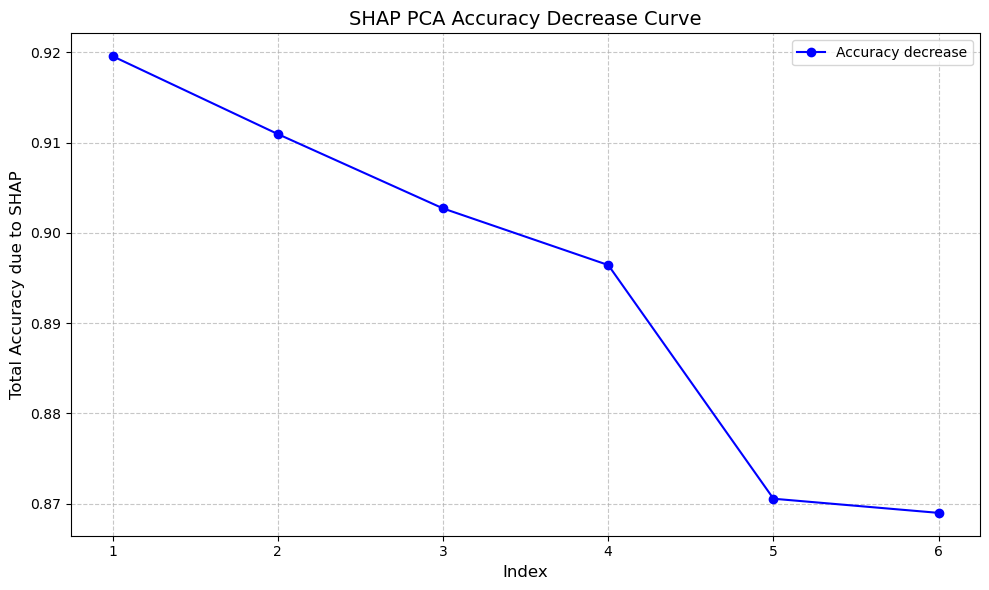

In [63]:
#plot for shap PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_SHAP_PCA_components_accuracies) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_SHAP_PCA_components_accuracies, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to SHAP', fontsize=12)
plt.title('SHAP PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [151]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(loaded_array_SHAP_PCA_components_accuracies, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 4.479207532365634


In [45]:
#odstraňování atributů v závislosti na tom, jestli patří do komponenty jako vybraný atribut za SHAP 
accuracies_shap_PCA = []
z = 0
while len(prispevky_atributu) > 1:
    data_df_clean_factor = data_df_clean
    print(f"HODNOTA Y: {z}")
    print(f"počet komponent: {len(prispevky_atributu)}")
    print(f"délka dataframu: {data_df_clean_factor.shape[1]}")
    prispivani = loadings.loc[array_shap_importance[z]]
    nejdulezitejsi_komponenta = prispivani.abs().idxmax()
    if nejdulezitejsi_komponenta in prispevky_atributu:
        print(f"odstraňovaná komponenta: {nejdulezitejsi_komponenta}")
        data_df_clean_factor = data_df_clean_factor.drop(columns=prispevky_atributu[nejdulezitejsi_komponenta])
        del prispevky_atributu[nejdulezitejsi_komponenta]
        #data_df_clean_factor.head(5)
        z +=1
    else:
        z +=1
        continue
    # Splitting the data into features and target labels
    X = data_df_clean_factor.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean_factor['medium']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)
    
    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])
    
    positive_class_label = 'medium:'+mediumid
    
    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])
    
    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                                iterations=100000, 
                                loss_function="Logloss",
                                learning_rate=0.05,#0.001
                                depth=4,
                                l2_leaf_reg=4,
                                bagging_temperature=1,
                                random_strength=6,
                                verbose=100)
    model.fit(train_data, 
                eval_set=val_data,
                early_stopping_rounds=50 
                )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracies_shap_PCA.append(accuracy_score(y_test_binary, y_pred))
    
#print(accuracy)             

HODNOTA Y: 0
počet komponent: 7
délka dataframu: 1684
odstraňovaná komponenta: PC1
0:	learn: 0.6586396	test: 0.6586613	best: 0.6586613 (0)	total: 15.2ms	remaining: 25m 19s
100:	learn: 0.2256290	test: 0.2254189	best: 0.2254189 (100)	total: 1.41s	remaining: 23m 17s
200:	learn: 0.2006628	test: 0.2025105	best: 0.2025105 (200)	total: 2.72s	remaining: 22m 30s
300:	learn: 0.1792411	test: 0.1861819	best: 0.1861819 (300)	total: 4.11s	remaining: 22m 42s
400:	learn: 0.1674813	test: 0.1787640	best: 0.1787640 (400)	total: 5.38s	remaining: 22m 16s
500:	learn: 0.1597308	test: 0.1737464	best: 0.1737464 (500)	total: 6.61s	remaining: 21m 52s
600:	learn: 0.1534412	test: 0.1701746	best: 0.1701740 (599)	total: 7.76s	remaining: 21m 24s
700:	learn: 0.1479216	test: 0.1671098	best: 0.1671098 (700)	total: 8.93s	remaining: 21m 5s
800:	learn: 0.1432128	test: 0.1643639	best: 0.1643591 (799)	total: 10.1s	remaining: 20m 53s
900:	learn: 0.1391394	test: 0.1620878	best: 0.1620878 (900)	total: 11.3s	remaining: 20m 40s
1

In [47]:
#uložení 
#np.save('SHAP_PCA_accuracy_array_for_components_reseting_dataset.npy', accuracies_shap_PCA)#save array of accuracies for PCA SHAP with reseting of dataset 

In [65]:
loaded_array_SHAP_PCA_components_accuracies_reseting = np.load('SHAP_PCA_accuracy_array_for_components_reseting_dataset.npy')
print(loaded_array_SHAP_PCA_components_accuracies_reseting)

[0.95292271 0.94546881 0.9450765  0.9525304  0.94115339 0.95331503]


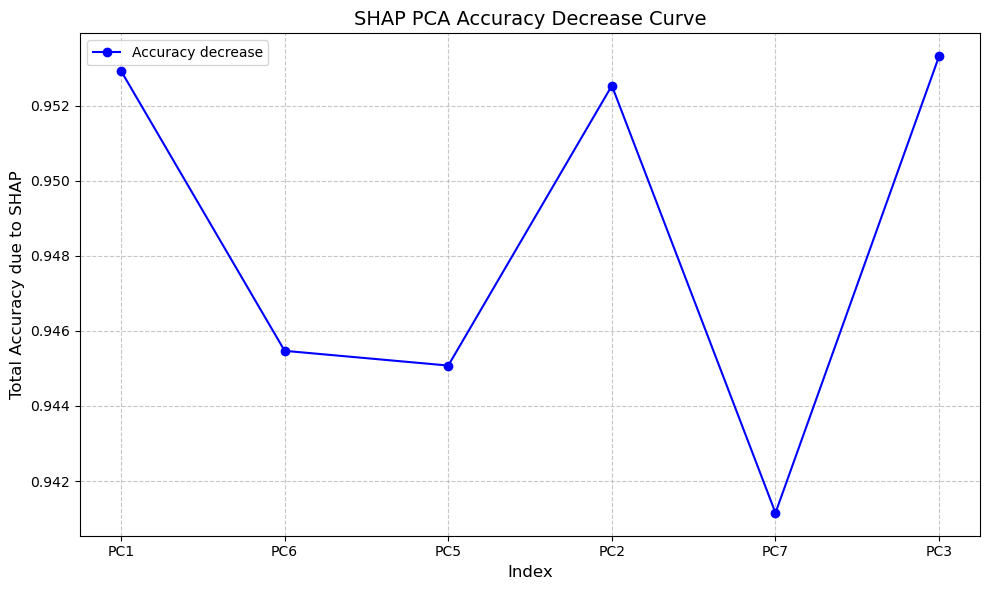

In [71]:
#plot for shap PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_SHAP_PCA_components_accuracies_reseting) + 1))
pca_components = ["PC1", "PC6", "PC5", "PC2", "PC7", "PC3"]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(pca_components, loaded_array_SHAP_PCA_components_accuracies_reseting, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12,)
plt.ylabel('Total Accuracy due to SHAP', fontsize=12)
plt.title('SHAP PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# Odstraňování jedné komponenty s obnovováním datasetu
accuracy_score_SHAP_components = []

# Postupné odebírání pouze jedné komponenty a trénování modelu
for i, component_to_remove in enumerate(names_of_components):
    # Rozdělení na trénovací, validační a testovací sady
    X_train, X_temp, y_train, y_temp = train_test_split(
        pca_components, 
        y, 
        test_size=0.3, 
        stratify=y, 
        random_state=RANDOM_SEED
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, 
        y_temp, 
        test_size=0.33, 
        stratify=y_temp, 
        random_state=RANDOM_SEED
    )

    # Vybereme pouze komponenty, které chceme nechat (odstraníme pouze jednu komponentu)
    component_index = int(component_to_remove[2:]) - 1
    X_train_reduced = X_train[:, ~np.isin(np.arange(X_train.shape[1]), [component_index])]
    X_val_reduced = X_val[:, ~np.isin(np.arange(X_val.shape[1]), [component_index])]
    X_test_reduced = X_test[:, ~np.isin(np.arange(X_test.shape[1]), [component_index])]
    
    # Vytvoření nových Pool objektů pro redukovaná data
    train_data_reduced = Pool(data=X_train_reduced, label=y_train, cat_features=[])
    val_data_reduced = Pool(data=X_val_reduced, label=y_val, cat_features=[])
    test_data_reduced = Pool(data=X_test_reduced, label=y_test, cat_features=[])

    # Inicializace nového modelu pro každou iteraci
    model = CatBoostClassifier(
        random_seed=RANDOM_SEED,
        iterations=100000,
        loss_function="Logloss",
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=4,
        bagging_temperature=1,
        random_strength=6,
        verbose=100
    )
    
    # Trénování modelu na redukovaných datech
    model.fit(train_data_reduced, eval_set=val_data_reduced, early_stopping_rounds=50, verbose=0)
    
    # Predikce a vyhodnocení přesnosti
    y_pred_reduced = model.predict(test_data_reduced)
    accuracy = accuracy_score(y_test, y_pred_reduced)
    
    accuracy_score_SHAP_components.append(accuracy)
    
    print(f"Accuracy without component {component_to_remove}: {accuracy:.4f}")


Accuracy without component PC3: 0.9211
Accuracy without component PC2: 0.9259
Accuracy without component PC4: 0.9243
Accuracy without component PC7: 0.9243
Accuracy without component PC6: 0.9204
Accuracy without component PC5: 0.9247
Accuracy without component PC1: 0.9231


In [57]:
#uložení 
np.save('accuracy_score_SHAP_components_reseting.npy', accuracy_score_SHAP_components)#save array of accuracies for PCA SHAP

In [59]:
loaded_array_SHAP_PCA_components_reseting = np.load('accuracy_score_SHAP_components_reseting.npy')
print(loaded_array_SHAP_PCA_components_reseting)

[0.92114555 0.92585328 0.92428403 0.92428403 0.92036093 0.92467634
 0.9231071 ]


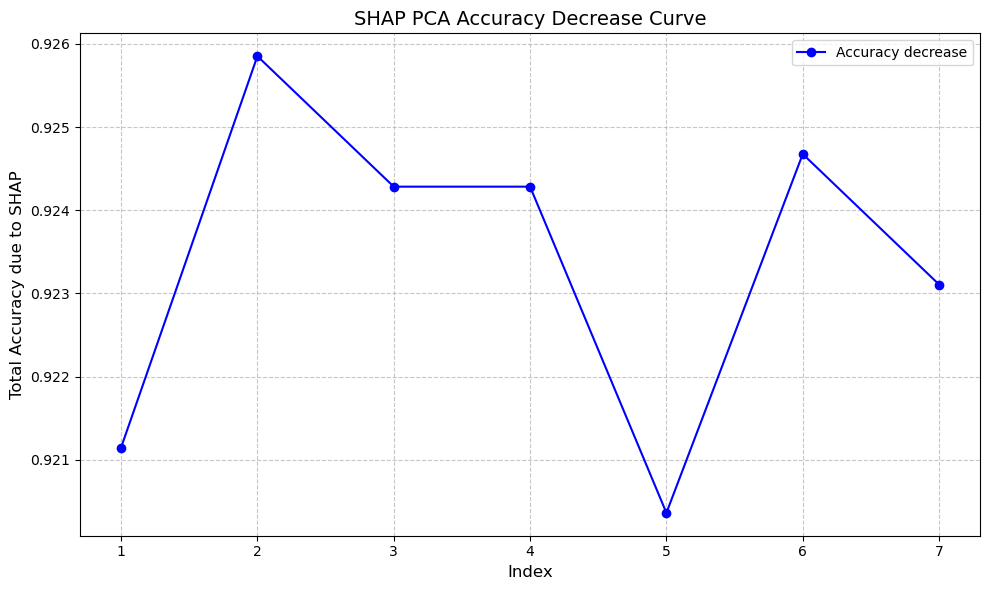

In [61]:
#plot for shap PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_SHAP_PCA_components_reseting) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_SHAP_PCA_components_reseting, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to SHAP', fontsize=12)
plt.title('SHAP PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# ARA

In [92]:
#odstraňování atributů v závislosti na tom, jestli patří do komponenty jako vybraný atribut za ARA
accuracies_ARA_PCA = []
z = 0
while len(prispevky_atributu) > 1:
    print(f"HODNOTA Y: {z}")
    print(f"počet komponent: {len(prispevky_atributu)}")
    print(f"délka dataframu: {data_df_clean_factor.shape[1]}")
    prispivani = loadings.loc[array_ara_importance[z]]
    nejdulezitejsi_komponenta = prispivani.abs().idxmax()
    if nejdulezitejsi_komponenta in prispevky_atributu:
        #print(f"počet atributů k odstranění: {len(prispevky_atributu[nejdulezitejsi_komponenta])}")
        data_df_clean_factor = data_df_clean_factor.drop(columns=prispevky_atributu[nejdulezitejsi_komponenta])
        del prispevky_atributu[nejdulezitejsi_komponenta]
        #data_df_clean_factor.head(5)
        z +=1
    else:
        z +=1
        continue
    # Splitting the data into features and target labels
    X = data_df_clean_factor.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean_factor['medium']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)
    
    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])
    
    positive_class_label = 'medium:'+mediumid
    
    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])
    
    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                                iterations=100000, 
                                loss_function="Logloss",
                                learning_rate=0.05,#0.001
                                depth=4,
                                l2_leaf_reg=4,
                                bagging_temperature=1,
                                random_strength=6,
                                verbose=100)
    model.fit(train_data, 
                eval_set=val_data,
                early_stopping_rounds=50 
                )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracies_ARA_PCA.append(accuracy_score(y_test_binary, y_pred))
    
#print(accuracy)             

HODNOTA Y: 0
počet komponent: 7
délka dataframu: 1684
0:	learn: 0.6585304	test: 0.6586987	best: 0.6586987 (0)	total: 11.6ms	remaining: 19m 16s
100:	learn: 0.2557052	test: 0.2607436	best: 0.2607436 (100)	total: 1.04s	remaining: 17m 11s
200:	learn: 0.2243701	test: 0.2319963	best: 0.2319963 (200)	total: 1.98s	remaining: 16m 20s
300:	learn: 0.1994854	test: 0.2120787	best: 0.2120787 (300)	total: 2.91s	remaining: 16m 4s
400:	learn: 0.1863075	test: 0.2028896	best: 0.2028896 (400)	total: 3.8s	remaining: 15m 44s
500:	learn: 0.1782725	test: 0.1976566	best: 0.1976566 (500)	total: 4.92s	remaining: 16m 17s
600:	learn: 0.1717171	test: 0.1938514	best: 0.1938514 (600)	total: 5.87s	remaining: 16m 11s
700:	learn: 0.1656282	test: 0.1899600	best: 0.1899600 (700)	total: 6.77s	remaining: 15m 59s
800:	learn: 0.1609746	test: 0.1873189	best: 0.1873189 (800)	total: 7.86s	remaining: 16m 13s
900:	learn: 0.1569048	test: 0.1848073	best: 0.1848073 (900)	total: 8.9s	remaining: 16m 19s
1000:	learn: 0.1529649	test: 0.1

In [94]:
np.save('ARA_PCA_accuracy_array.npy', accuracies_ARA_PCA)#save array of accuracies for PCA ARA

In [13]:
loaded_array_ARA_PCA_accuracies = np.load('ARA_PCA_accuracy_array.npy')
print(loaded_array_ARA_PCA_accuracies)

[0.94546881 0.93919184 0.93683798 0.91683013 0.89525304 0.87995292]


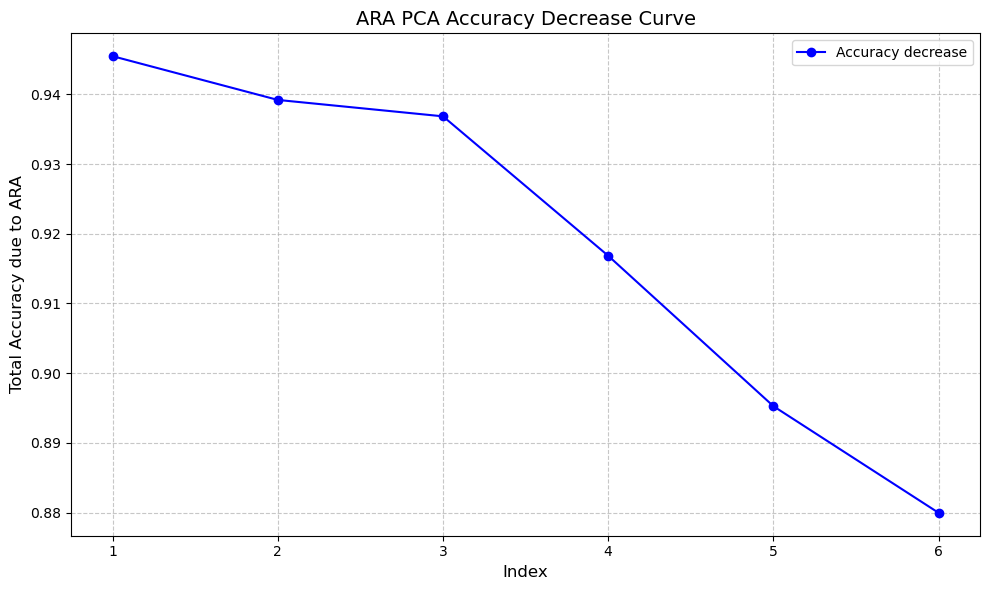

In [98]:
#plot for ARA PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_ARA_PCA_accuracies) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_ARA_PCA_accuracies, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(loaded_array_ARA_PCA_accuracies, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 4.600823852491173


0:	learn: 0.6442068	test: 0.6452497	best: 0.6452497 (0)	total: 6.51ms	remaining: 10m 50s
100:	learn: 0.2202807	test: 0.2255343	best: 0.2255343 (100)	total: 712ms	remaining: 11m 43s
200:	learn: 0.2081405	test: 0.2161206	best: 0.2161206 (200)	total: 1.33s	remaining: 10m 58s
300:	learn: 0.1956470	test: 0.2087693	best: 0.2087626 (299)	total: 1.86s	remaining: 10m 16s
400:	learn: 0.1860380	test: 0.2044945	best: 0.2044686 (399)	total: 2.62s	remaining: 10m 50s
500:	learn: 0.1787619	test: 0.2017110	best: 0.2017022 (499)	total: 3.27s	remaining: 10m 50s
600:	learn: 0.1729597	test: 0.1995202	best: 0.1995199 (596)	total: 3.91s	remaining: 10m 46s
700:	learn: 0.1683537	test: 0.1985987	best: 0.1985733 (698)	total: 4.58s	remaining: 10m 48s
800:	learn: 0.1639239	test: 0.1971810	best: 0.1971810 (800)	total: 5.25s	remaining: 10m 49s
900:	learn: 0.1601634	test: 0.1964846	best: 0.1964846 (900)	total: 5.95s	remaining: 10m 54s
1000:	learn: 0.1568043	test: 0.1957105	best: 0.1957105 (1000)	total: 6.64s	remainin

C:\Users\Marek H\AppData\Local\Temp\ipykernel_13324\4173906551.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ara_importance.index, y=ara_importance["mean_importance"], palette="viridis")


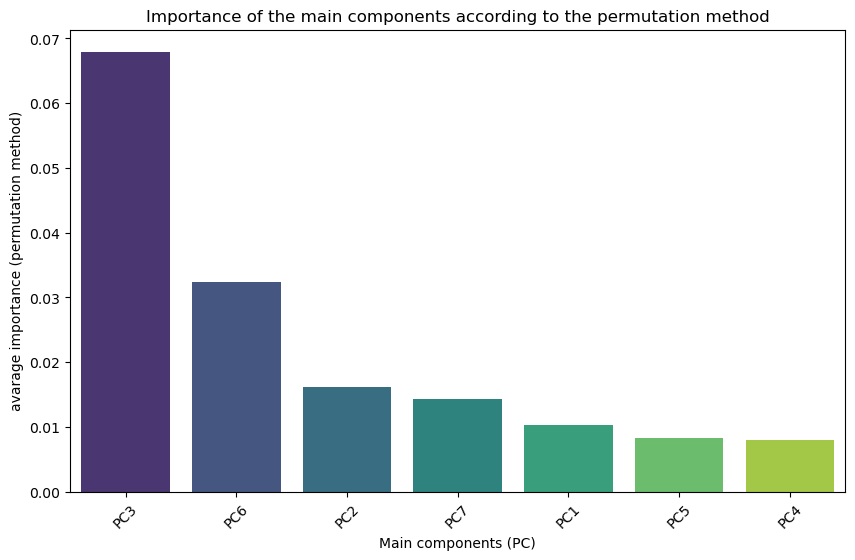

In [12]:
# 1. Splitting the data into features and target labels
X = data_df_clean_factor.drop('medium', axis=1)  # features (bez cílové proměnné)
y = data_df_clean_factor['medium']  # cílová proměnná

# 2. Provedení PCA
pca = PCA(n_components=7)
pca_components = pca.fit_transform(X)  # aplikace PCA na vstupní data (X)

# 3. Rozdělení na trénovací, validační a testovací sady
X_train, X_temp, y_train, y_temp = train_test_split(pca_components, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

# 4. Převedení cílové proměnné na binární formát
positive_class_label = 'medium:' + mediumid
y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)

# 5. Vytvoření Pool objektů pro CatBoost
train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])

# 6. Trénování CatBoost modelu
model = CatBoostClassifier(
    random_seed=RANDOM_SEED,
    iterations=100000,
    loss_function="Logloss",
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=4,
    bagging_temperature=1,
    random_strength=6,
    verbose=100
)

# 7. Trénování na hlavních komponentách (PCA transformovaných datech)
model.fit(train_data, 
          eval_set=val_data, 
          early_stopping_rounds=50)

# 8. Predikce na testovacích datech
y_pred = model.predict(test_data)
y_pred_proba = model.predict_proba(test_data)[:, 1]  # Pravděpodobnosti pro pozitivní třídu

# 9. Vyhodnocení metriky přesnost
print("Accuracy:", accuracy_score(y_test_binary, y_pred))

# 10. ARA analýza (Accumulated Relevance Analysis)
ara_result = permutation_importance(model, X_test, y_test_binary, n_repeats=30, random_state=RANDOM_SEED, scoring="accuracy")

# 11. Uložení výsledků důležitosti komponent
ara_importance = pd.DataFrame(ara_result.importances_mean, 
                              index=[f'PC{i+1}' for i in range(X_test.shape[1])], 
                              columns=["mean_importance"])

# Seřazení podle důležitosti
ara_importance = ara_importance.sort_values(by="mean_importance", ascending=False)

# Výpis důležitosti hlavních komponent
print(ara_importance)

# 12. Vizualizace důležitosti komponent pomocí barplotu
plt.figure(figsize=(10, 6))
sns.barplot(x=ara_importance.index, y=ara_importance["mean_importance"], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Main components (PC)")
plt.ylabel("avarage importance (permutation method)")
plt.title("Importance of the main components according to the permutation method")
plt.show()


In [25]:
# Uložení výsledků ARA analýzy do CSV souboru
ara_importance.to_csv("ara_importance.csv")

In [14]:
ara_importance_components_loaded = pd.read_csv("ara_importance.csv")

In [16]:
ara_importance_components_loaded

,Unnamed: 0,mean_importance
0,PC3,0.067948
1,PC6,0.032366
2,PC2,0.016163
3,PC7,0.014267
4,PC1,0.010344
5,PC5,0.008304
6,PC4,0.007977


In [18]:
ara_importance_array_full = ara_importance_components_loaded.values
print(ara_importance_array_full )

[['PC3' 0.0679482149862691]
 ['PC6' 0.0323656335817968]
 ['PC2' 0.0161632012553942]
 ['PC7' 0.0142670328233294]
 ['PC1' 0.0103439257225055]
 ['PC5' 0.0083039100300771]
 ['PC4' 0.0079769844383418]]


In [20]:
names_of_components = []
for component in ara_importance_array_full:
    names_of_components.append(component[0])
print(names_of_components)

['PC3', 'PC6', 'PC2', 'PC7', 'PC1', 'PC5', 'PC4']


In [42]:
accuracy_score_ARA_components = []

# 7. Postupné odebírání komponent a trénování modelu
for i in range(len(names_of_components) - 1):
    # Vytvoření seznamu komponent k odebrání
    components_to_remove = names_of_components[:i+1]

    # 3. Rozdělení na trénovací, validační a testovací sady
    X_train, X_temp, y_train, y_temp = train_test_split(pca_components, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)
        
    # Vybereme pouze komponenty, které chceme nechat
    X_train_reduced = X_train[:, ~np.isin(np.arange(X_train.shape[1]), [int(pc[2:])-1 for pc in components_to_remove])]
    X_val_reduced = X_val[:, ~np.isin(np.arange(X_val.shape[1]), [int(pc[2:])-1 for pc in components_to_remove])]
    X_test_reduced = X_test[:, ~np.isin(np.arange(X_test.shape[1]), [int(pc[2:])-1 for pc in components_to_remove])]
    
    # Vytvoření nových Pool objektů pro redukovaná data
    train_data_reduced = Pool(data=X_train_reduced, label=y_train_binary, cat_features=[])
    val_data_reduced = Pool(data=X_val_reduced, label=y_val_binary, cat_features=[])
    test_data_reduced = Pool(data=X_test_reduced, label=y_test_binary, cat_features=[])

    # Inicializace nového modelu pro každou iteraci
    model = CatBoostClassifier(
        random_seed=RANDOM_SEED,
        iterations=100000,
        loss_function="Logloss",
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=4,
        bagging_temperature=1,
        random_strength=6,
        verbose=100
    )
    
    # Trénování modelu na redukovaných datech
    model.fit(train_data_reduced, eval_set=val_data_reduced, early_stopping_rounds=50, verbose=0)
    
    # Predikce a vyhodnocení přesnosti
    y_pred_reduced = model.predict(test_data_reduced)
    accuracy = accuracy_score(y_test_binary, y_pred_reduced)
    
    accuracy_score_ARA_components.append(accuracy)
    
    print(f"Accuracy without components {components_to_remove}: {accuracy:.4f}")



Accuracy without components ['PC3']: 0.9192
Accuracy without components ['PC3', 'PC6']: 0.9106
Accuracy without components ['PC3', 'PC6', 'PC2']: 0.8882
Accuracy without components ['PC3', 'PC6', 'PC2', 'PC7']: 0.8745
Accuracy without components ['PC3', 'PC6', 'PC2', 'PC7', 'PC1']: 0.8729
Accuracy without components ['PC3', 'PC6', 'PC2', 'PC7', 'PC1', 'PC5']: 0.8686


In [44]:
#uložení 
np.save('ARA_PCA_accuracy_array_for_components.npy', accuracy_score_ARA_components)#save array of accuracies for PCA ARA

In [22]:
loaded_array_ARA_PCA_components_accuracies = np.load('ARA_PCA_accuracy_array_for_components.npy')
print(loaded_array_ARA_PCA_components_accuracies)

[0.91918399 0.91055316 0.88819145 0.87446057 0.87289133 0.86857591]


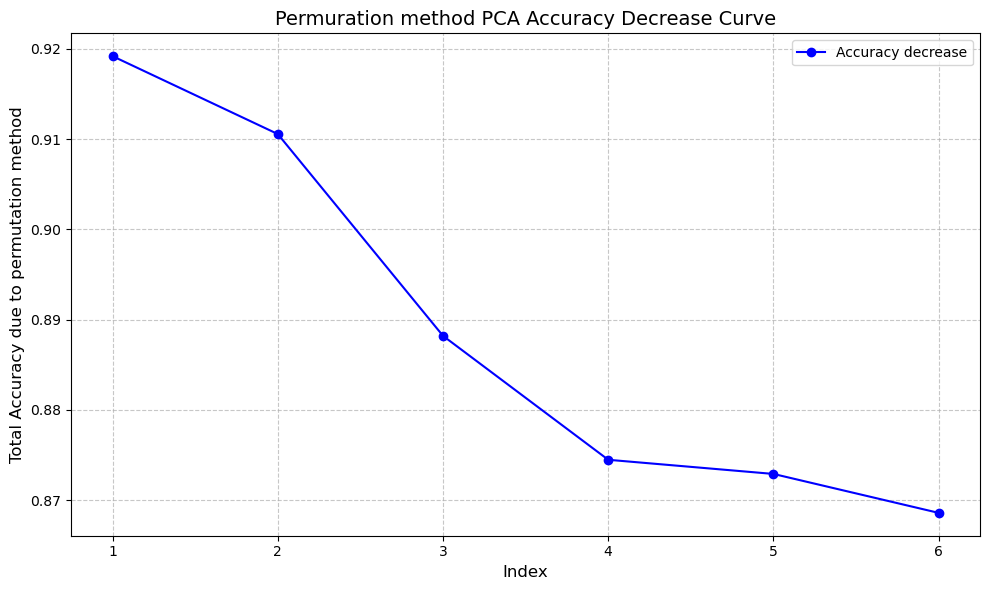

In [24]:
#plot for ARA PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_ARA_PCA_components_accuracies) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_ARA_PCA_components_accuracies, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to permutation method', fontsize=12)
plt.title('Permuration method PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(loaded_array_ARA_PCA_components_accuracies, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 4.439976461357395


In [70]:
#odstraňování atributů v závislosti na tom, jestli patří do komponenty jako vybraný atribut za SHAP s obnovováním datasetu 
accuracies_ara_PCA = []
z = 0
while len(prispevky_atributu) > 1:
    data_df_clean_factor = data_df_clean
    print(f"HODNOTA Y: {z}")
    print(f"počet komponent: {len(prispevky_atributu)}")
    print(f"délka dataframu: {data_df_clean_factor.shape[1]}")
    prispivani = loadings.loc[array_ara_importance[z]]
    nejdulezitejsi_komponenta = prispivani.abs().idxmax()
    if nejdulezitejsi_komponenta in prispevky_atributu:
        print(f"odstraňovaná komponenta: {nejdulezitejsi_komponenta}")
        data_df_clean_factor = data_df_clean_factor.drop(columns=prispevky_atributu[nejdulezitejsi_komponenta])
        del prispevky_atributu[nejdulezitejsi_komponenta]
        #data_df_clean_factor.head(5)
        z +=1
    else:
        z +=1
        continue
    # Splitting the data into features and target labels
    X = data_df_clean_factor.drop('medium', axis=1)#data_pairs_clean_filtered[['subject']]
    y = data_df_clean_factor['medium']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)
    
    train_data = Pool(data=X_train, label=y_train, cat_features=[])
    val_data = Pool(data=X_val, label=y_val, cat_features=[])
    test_data = Pool(data=X_test, label=y_test, cat_features=[])
    
    positive_class_label = 'medium:'+mediumid
    
    # Convert labels to binary format
    y_train_binary = y_train.apply(lambda x: 1 if x == positive_class_label else 0)
    y_val_binary = y_val.apply(lambda x: 1 if x == positive_class_label else 0)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Create Pool objects with binary labels
    train_data = Pool(data=X_train, label=y_train_binary, cat_features=[])
    val_data = Pool(data=X_val, label=y_val_binary, cat_features=[])
    test_data = Pool(data=X_test, label=y_test_binary, cat_features=[])
    
    #%%time
    model = CatBoostClassifier(random_seed=RANDOM_SEED,
                                iterations=100000, 
                                loss_function="Logloss",
                                learning_rate=0.05,#0.001
                                depth=4,
                                l2_leaf_reg=4,
                                bagging_temperature=1,
                                random_strength=6,
                                verbose=100)
    model.fit(train_data, 
                eval_set=val_data,
                early_stopping_rounds=50 
                )#, plot=True)
    y_test_binary = y_test.apply(lambda x: 1 if x == positive_class_label else 0)
    
    # Predict on test data
    y_pred = model.predict(test_data)
    y_pred_proba = model.predict_proba(test_data)[:,1]  # Probabilities for the positive class
    # Print metrics
    print("Accuracy:", accuracy_score(y_test_binary, y_pred))
    accuracies_ara_PCA.append(accuracy_score(y_test_binary, y_pred))
    
#print(accuracy)             

HODNOTA Y: 0
počet komponent: 7
délka dataframu: 1684
odstraňovaná komponenta: PC6
0:	learn: 0.6548253	test: 0.6552773	best: 0.6552773 (0)	total: 10.8ms	remaining: 17m 59s
100:	learn: 0.2565257	test: 0.2617498	best: 0.2617498 (100)	total: 1.08s	remaining: 17m 54s
200:	learn: 0.2292982	test: 0.2377360	best: 0.2377360 (200)	total: 2.17s	remaining: 17m 58s
300:	learn: 0.2003141	test: 0.2124017	best: 0.2124017 (300)	total: 3.28s	remaining: 18m 7s
400:	learn: 0.1877415	test: 0.2033829	best: 0.2033829 (400)	total: 4.47s	remaining: 18m 31s
500:	learn: 0.1792653	test: 0.1979993	best: 0.1979993 (500)	total: 5.71s	remaining: 18m 53s
600:	learn: 0.1723088	test: 0.1933447	best: 0.1933447 (600)	total: 7.02s	remaining: 19m 21s
700:	learn: 0.1670936	test: 0.1902141	best: 0.1902141 (700)	total: 8.18s	remaining: 19m 19s
800:	learn: 0.1623176	test: 0.1872159	best: 0.1872159 (800)	total: 9.37s	remaining: 19m 20s
900:	learn: 0.1575014	test: 0.1844196	best: 0.1844196 (900)	total: 10.4s	remaining: 19m 9s
10

In [74]:
#uložení 
np.save('ARA_PCA_accuracy_array_for_components_reseting_dataset.npy', accuracies_ara_PCA)#save array of accuracies for PCA SHAP with reseting of dataset 

In [76]:
loaded_array_ARA_PCA_components_accuracies_reseting = np.load('ARA_PCA_accuracy_array_for_components_reseting_dataset.npy')
print(loaded_array_ARA_PCA_components_accuracies_reseting)

[0.94782268 0.9450765  0.9525304  0.93879953 0.95331503 0.94664574]


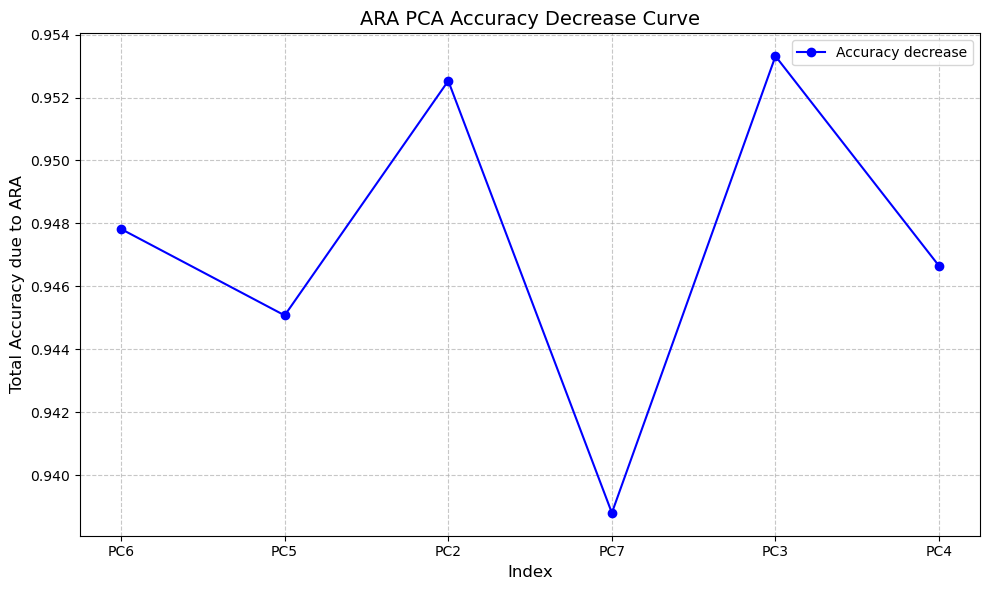

In [80]:
#plot for shap PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_ARA_PCA_components_accuracies_reseting) + 1))
pca_components = ["PC6", "PC5", "PC2", "PC7", "PC3", "PC4"]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(pca_components, loaded_array_ARA_PCA_components_accuracies_reseting, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12,)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [96]:
# Odstraňování jedné komponenty s obnovováním datasetu pro ARA 
accuracy_score_ARA_components = []

# Postupné odebírání pouze jedné komponenty a trénování modelu
for i, component_to_remove in enumerate(names_of_components):
    # Rozdělení na trénovací, validační a testovací sady
    X_train, X_temp, y_train, y_temp = train_test_split(
        pca_components, 
        y, 
        test_size=0.3, 
        stratify=y, 
        random_state=RANDOM_SEED
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, 
        y_temp, 
        test_size=0.33, 
        stratify=y_temp, 
        random_state=RANDOM_SEED
    )

    # Vybereme pouze komponenty, které chceme nechat (odstraníme pouze jednu komponentu)
    component_index = int(component_to_remove[2:]) - 1
    X_train_reduced = X_train[:, ~np.isin(np.arange(X_train.shape[1]), [component_index])]
    X_val_reduced = X_val[:, ~np.isin(np.arange(X_val.shape[1]), [component_index])]
    X_test_reduced = X_test[:, ~np.isin(np.arange(X_test.shape[1]), [component_index])]
    
    # Vytvoření nových Pool objektů pro redukovaná data
    train_data_reduced = Pool(data=X_train_reduced, label=y_train, cat_features=[])
    val_data_reduced = Pool(data=X_val_reduced, label=y_val, cat_features=[])
    test_data_reduced = Pool(data=X_test_reduced, label=y_test, cat_features=[])

    # Inicializace nového modelu pro každou iteraci
    model = CatBoostClassifier(
        random_seed=RANDOM_SEED,
        iterations=100000,
        loss_function="Logloss",
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=4,
        bagging_temperature=1,
        random_strength=6,
        verbose=100
    )
    
    # Trénování modelu na redukovaných datech
    model.fit(train_data_reduced, eval_set=val_data_reduced, early_stopping_rounds=50, verbose=0)
    
    # Predikce a vyhodnocení přesnosti
    y_pred_reduced = model.predict(test_data_reduced)
    accuracy = accuracy_score(y_test, y_pred_reduced)
    
    accuracy_score_ARA_components.append(accuracy)
    
    print(f"Accuracy without component {component_to_remove}: {accuracy:.4f}")


Accuracy without component PC3: 0.9196
Accuracy without component PC6: 0.9184
Accuracy without component PC2: 0.9262
Accuracy without component PC7: 0.9231
Accuracy without component PC1: 0.9259
Accuracy without component PC5: 0.9243
Accuracy without component PC4: 0.9243


In [98]:
#uložení 
np.save('accuracy_score_ARA_components_reseting.npy', accuracy_score_ARA_components)#save array of accuracies for PCA ARA

In [100]:
loaded_array_ARA_PCA_components_reseting = np.load('accuracy_score_ARA_components_reseting.npy')
print(loaded_array_ARA_PCA_components_reseting)

[0.9195763  0.91839937 0.92624559 0.9231071  0.92585328 0.92428403
 0.92428403]


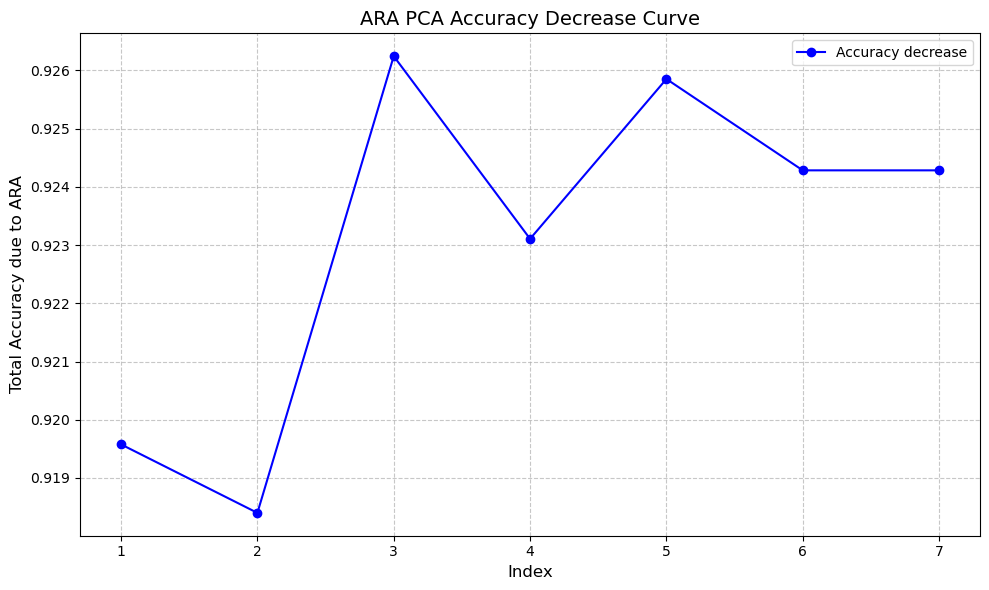

In [104]:
#plot for ARA PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(loaded_array_ARA_PCA_components_reseting) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, loaded_array_ARA_PCA_components_reseting, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data_df_clean_factor = pd.read_csv('data_clean_factor.csv')
data_df_clean_factor = data_df_clean_factor.set_index(data_df_clean_factor.columns[0])
data_df_clean_factor = data_df_clean_factor.drop(columns=['medium'])

In [16]:
#PCA
pca = PCA(n_components=7)  
pca.fit(data_df_clean_factor)
ev = pca.explained_variance_
pca_components = pca.transform(data_df_clean_factor)

In [18]:
# převedení na df 
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

In [20]:
pca_df = pd.read_csv('pca_df.csv')

In [22]:
target_value_for_pcadf = data_df_clean['medium']

In [24]:
pca_df['medium'] = target_value_for_pcadf.values

In [38]:
# Converting components to categorical variables
components = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
for varname in ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']: 
    pca_df[varname] = pd.qcut(pca_df[varname], q=3,)  # 3 categorie

# specification of target value and components
a = ara(df=pca_df, 
        target='medium',  # target value 
        target_class='medium:65', 
        options={"max_depth":1})
        #CL= components) 

# printing of results 
a.print_result()  
a.print_task_info()  
a.print_statisics()  


print(f"   ...full results : {a.get_task_info()}")
print(f"   ...only results : {a.get_results()}")
print(f"   ...only rules   : {a.get_rules()}")

ARA version 0.3.0
..will initialize CLM#1
Cleverminer version 1.2.1.
Starting data preparation ...
Automatically reordering numeric categories ...
Automatically reordering numeric categories ...done
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 42, rules 42, times: prep 0.07sec, processing 0.02sec

ARA: VARIABLES THAT INFLUENCE TARGET CLASS SIGNIFICANTLY:
(+ increases occurrence, - decreases occurrence, more signs means stronger influence)

-.. PC2((-3.0509999999999997, -0.31]) /2.7 (=/2.7)
+.. PC3((-3.995, -0.15]) x2.4 (=x2.4)
-.. PC3((-0.15, 0.0668]) /2.9 (=/2.9)
-.. PC3((-0.15, 0.0668] (0.0668, 4.086]) /3.1 (=/3.1)
-.. PC3((0.0668, 4.086]) /3.3 (=/3.3)
-.. PC6((-2.597, -0.153]) /2.9 (=/2.9)
-.. PC6((-2.597, -0.153] (-0.153, 0.113]) /2.3 (=/2.3)
+.. PC6((0.113, 3.677]) x2.1 (=x2.1

In [36]:
komponentsWithIntervals = [
    ["PC3", (0.0668, 4.086)],
    ["PC3", (-0.15, 0.4068)],# upravený interval (-0.15, 0.0668] (0.0668, 4.086]
    ["PC3", (-0.15, 0.0668)],
    ["PC6", (-2.597, -0.153)],
    ["PC2", (-3.0509999999999997, -0.31)],
    ["PC3", (-3.995, -0.15)],
    ["PC6", (-2.597, 0.113)],
    ["PC6", (0.113, 3.677)]
]

In [104]:
pca_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,medium
0,-1.171596,-0.312155,-0.212133,-0.116919,0.117336,0.086911,-0.155565,other
1,-1.204512,-0.251479,-0.106682,-0.179918,0.174324,0.042451,-0.053778,other
2,-0.672211,0.105706,0.235132,-0.160629,0.087772,-0.472770,-0.249371,other
3,-0.889322,-0.316972,-0.198376,-0.140615,-0.046338,0.073044,-0.626331,other
4,-1.208842,-0.269770,-0.140332,-0.126607,0.065527,0.066801,-0.066333,other


In [28]:
pca_df.to_csv("df_for_ARA.csv", index=False)

In [30]:
pca_df = pd.read_csv("df_for_ARA.csv")


In [106]:

accuracy_score_ARA_components = []

# Kopie původních dat
df_copy = pca_df.copy()
pca_temp = pca_components.copy()

for i in range(len(komponentsWithIntervals)):
    component_name, interval = komponentsWithIntervals[i]
    
    # Najdeme řádky, které spadají do důležitého intervalu
    affected_rows = (df_copy[component_name] > interval[0]) & (df_copy[component_name] <= interval[1])

    # Najdeme hodnoty mimo daný interval
    outside_values = df_copy.loc[~affected_rows, component_name].values

    # Pokud máme dostatek hodnot mimo interval, provedeme náhodnou náhradu
    if len(outside_values) > 0:
        random_replacement = np.random.choice(outside_values, size=affected_rows.sum(), replace=True)
        df_copy.loc[affected_rows, component_name] = random_replacement

        component_index = int(component_name[2:]) - 1
        pca_temp[affected_rows, component_index] = random_replacement
    else:
        print(f"[{i+1}] WARNING: Žádné hodnoty mimo interval {interval} pro {component_name}, nelze nahradit.")

    # Příprava dat
    X = df_copy.drop('medium', axis=1)
    y = df_copy['medium']

    positive_class_label = 'medium:' + mediumid
    y_binary = y.apply(lambda x: 1 if x == positive_class_label else 0)

    # Rozdělení
    X_train, X_temp, y_train, y_temp = train_test_split(pca_temp, y_binary, test_size=0.3, stratify=y_binary, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=RANDOM_SEED)

    train_data = Pool(data=X_train, label=y_train)
    val_data = Pool(data=X_val, label=y_val)
    test_data = Pool(data=X_test, label=y_test)

    # Trénink modelu
    model = CatBoostClassifier(
        random_seed=RANDOM_SEED,
        iterations=100000,
        loss_function="Logloss",
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=4,
        bagging_temperature=1,
        random_strength=6,
        verbose=0
    )
    
    model.fit(train_data, eval_set=val_data, early_stopping_rounds=50, verbose=0)

    y_pred = model.predict(test_data)
    acc = accuracy_score(y_test, y_pred)
    accuracy_score_ARA_components.append(acc)

    print(f"[{i+1}] Accuracy after replacing {component_name} in interval {interval}: {acc:.4f}")


[1] Accuracy after replacing PC3 in interval (0.0668, 4.086): 0.9196
[2] Accuracy after replacing PC3 in interval (-0.15, 0.4068): 0.9180
[3] Accuracy after replacing PC3 in interval (-0.15, 0.0668): 0.9180
[4] Accuracy after replacing PC6 in interval (-2.597, -0.153): 0.9164
[5] Accuracy after replacing PC2 in interval (-3.0509999999999997, -0.31): 0.9121
[6] Accuracy after replacing PC3 in interval (-3.995, -0.15): 0.9106
[7] Accuracy after replacing PC6 in interval (-2.597, 0.113): 0.9062
[8] Accuracy after replacing PC6 in interval (0.113, 3.677): 0.9011


In [108]:
print(accuracy_score_ARA_components)

[0.919576304433111, 0.9180070615927814, 0.9180070615927814, 0.9164378187524519, 0.9121224009415457, 0.9105531581012162, 0.9062377402903099, 0.901137701059239]


In [42]:
overall_accuracies = []

In [110]:
overall_accuracies.append(accuracy_score_ARA_components)
print(overall_accuracies)

[[0.9207532365633582, 0.9203609258532758, 0.9203609258532758, 0.9180070615927814, 0.9117300902314633, 0.9038838760298156, 0.8999607689289918, 0.8952530404080031], [0.9207532365633582, 0.9203609258532758, 0.9203609258532758, 0.9180070615927814, 0.9117300902314633, 0.9038838760298156, 0.8999607689289918, 0.8952530404080031], [0.9223224794036877, 0.9187916830129462, 0.9187916830129462, 0.9152608866222048, 0.9129070223617105, 0.9038838760298156, 0.9054531188701451, 0.8960376618281679], [0.9191839937230286, 0.9191839937230286, 0.9191839937230286, 0.9156531973322871, 0.9152608866222048, 0.904276186739898, 0.9034915653197332, 0.8976069046684975], [0.9203609258532758, 0.9203609258532758, 0.9203609258532758, 0.9144762652020401, 0.9125147116516281, 0.9085916045508042, 0.904276186739898, 0.8995684582189094], [0.9219301686936053, 0.9183993723028638, 0.9183993723028638, 0.9140839544919577, 0.9129070223617105, 0.9078069831306395, 0.8972145939584151, 0.8983915260886622], [0.9203609258532758, 0.921537

In [134]:
avarage_accuracies = [0,0,0,0,0,0,0,0]
for i in overall_accuracies:
    for j in range(len(i)):
        avarage_accuracies[j] += i[j]
accuracies_for_plot = []
for m in avarage_accuracies:
    accuracies_for_plot.append(m/10)
print(accuracies_for_plot)

[0.9205963122793251, 0.9195763044331111, 0.9195763044331111, 0.9150255001961554, 0.9125931737936444, 0.9069046684974499, 0.9020792467634365, 0.8974892114554727]


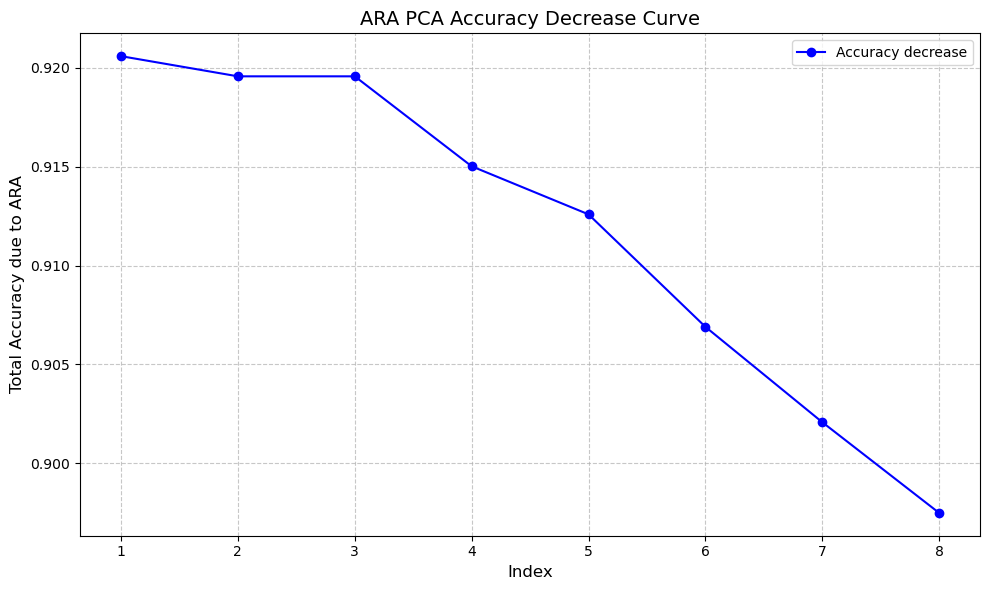

In [136]:
#plot for ture ARA PCA
# X-axis values (1 to length of array)
x_values = list(range(1, len(accuracies_for_plot) + 1))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, accuracies_for_plot, marker='o', linestyle='-', color='b', label='Accuracy decrease')

# Adding labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Accuracy due to ARA', fontsize=12)
plt.title('ARA PCA Accuracy Decrease Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [117]:
# výpočet plochy pod křivkou pomocí integrace 
# Numerická integrace pomocí trapezoidálního pravidla - rozdělení na lichoběžníky v šířce dvou sousedních bodů na ose X
area = np.trapz(accuracy_score_ARA_components, dx=1)  # dx=1 odpovídá rovnoměrným vzdálenostem na ose X
print(f"Přesná plocha pod křivkou: {area}")

Přesná plocha pod křivkou: 6.3713220870929765
